# Smart City Traffic Patterns

# Importing Libraries

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings  
warnings.filterwarnings("ignore")  

In [263]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.15.0


In [264]:
import tensorflow
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

# Data Collection

In [265]:
#data collection

In [266]:
data=pd.read_csv('train_aWnotuB.csv')

In [267]:
data.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

# Data Preprocessing

In [268]:
data.drop(columns=['ID'],inplace=True)

In [269]:
data.head()

DateTime  Junction  Vehicles
0  2015-11-01 00:00:00         1        15
1  2015-11-01 01:00:00         1        13
2  2015-11-01 02:00:00         1        10
3  2015-11-01 03:00:00         1         7
4  2015-11-01 04:00:00         1         9

In [270]:
data.pivot_table(index="Junction",values="Vehicles")

Vehicles
Junction           
1         45.052906
2         14.253221
3         13.694010
4          7.251611

# Data Cleaning

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [272]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [273]:
data.dropna(inplace=True)

In [274]:
data.describe()

Junction      Vehicles
count  48120.000000  48120.000000
mean       2.180549     22.791334
std        0.966955     20.750063
min        1.000000      1.000000
25%        1.000000      9.000000
50%        2.000000     15.000000
75%        3.000000     29.000000
max        4.000000    180.000000

# Feature Engineering

Converting the DateTime to required formats

In [275]:
#converting to required datetime format

data['DateTime']=pd.to_datetime(data['DateTime'])
data['Year'] = data['DateTime'].apply(lambda time: time.year)
data['Month'] = data['DateTime'].apply(lambda time: time.month)
data['Day']=data['DateTime'].apply(lambda time: time.day)
data['Day of Week'] = data['DateTime'].apply(lambda time: time.dayofweek)
data['hour'] = data['DateTime'].apply(lambda time: time.hour)


In [276]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

In [277]:
tmap={'Mon':'WORKDAY','Tue':'WORKDAY','Wed':'WORKDAY','Thu':'WORKDAY','Fri':'WORKDAY','Sat':'HOLIDAY','Sun':'HOLIDAY'}
data['W/H']=data['Day of Week'].map(tmap)

In [278]:
data.head()

DateTime  Junction  Vehicles  Year  Month  Day Day of Week  hour  \
0 2015-11-01 00:00:00         1        15  2015     11    1         Sun     0   
1 2015-11-01 01:00:00         1        13  2015     11    1         Sun     1   
2 2015-11-01 02:00:00         1        10  2015     11    1         Sun     2   
3 2015-11-01 03:00:00         1         7  2015     11    1         Sun     3   
4 2015-11-01 04:00:00         1         9  2015     11    1         Sun     4   

       W/H  
0  HOLIDAY  
1  HOLIDAY  
2  HOLIDAY  
3  HOLIDAY  
4  HOLIDAY

In [279]:
#divide the data according to year

newdata_2015=data[data['Year']==2015]
newdata_2016=data[data['Year']==2016]
newdata_2017=data[data['Year']==2017]

# data visualization

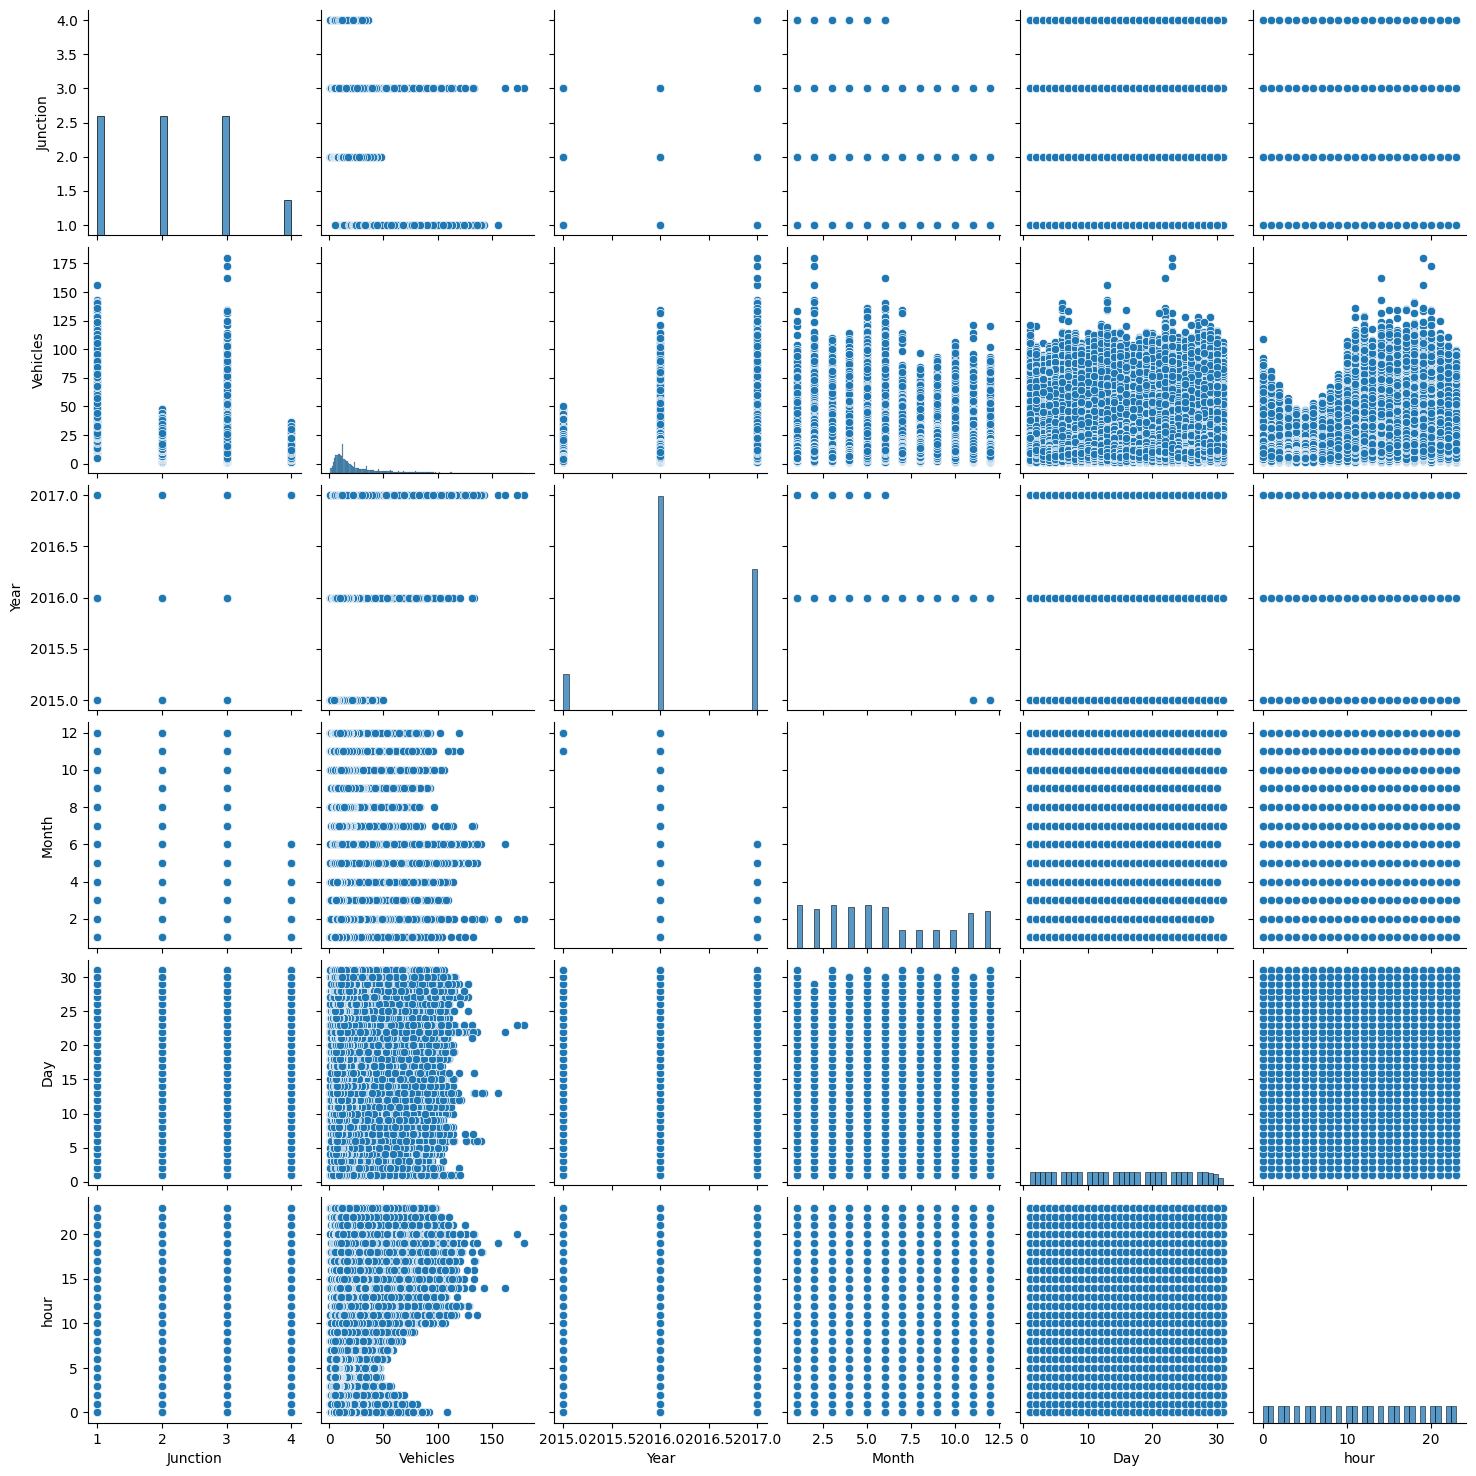

In [280]:
sns.pairplot(data,palette='coolwarm')

<Axes: xlabel='Junction', ylabel='Vehicles'>

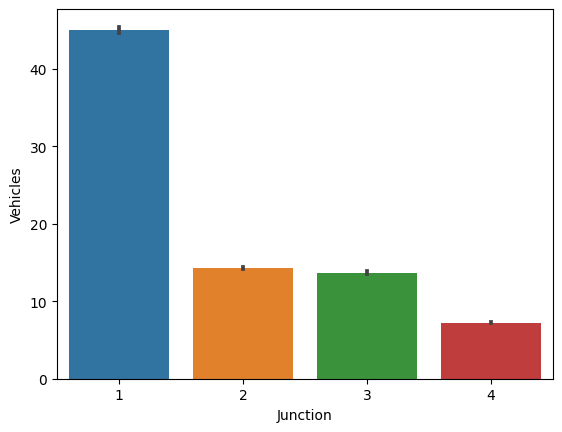

In [281]:
#Junction vs Vehicles(overall data)

sns.barplot(x='Junction',y='Vehicles',data=data)

<Axes: xlabel='hour', ylabel='Vehicles'>

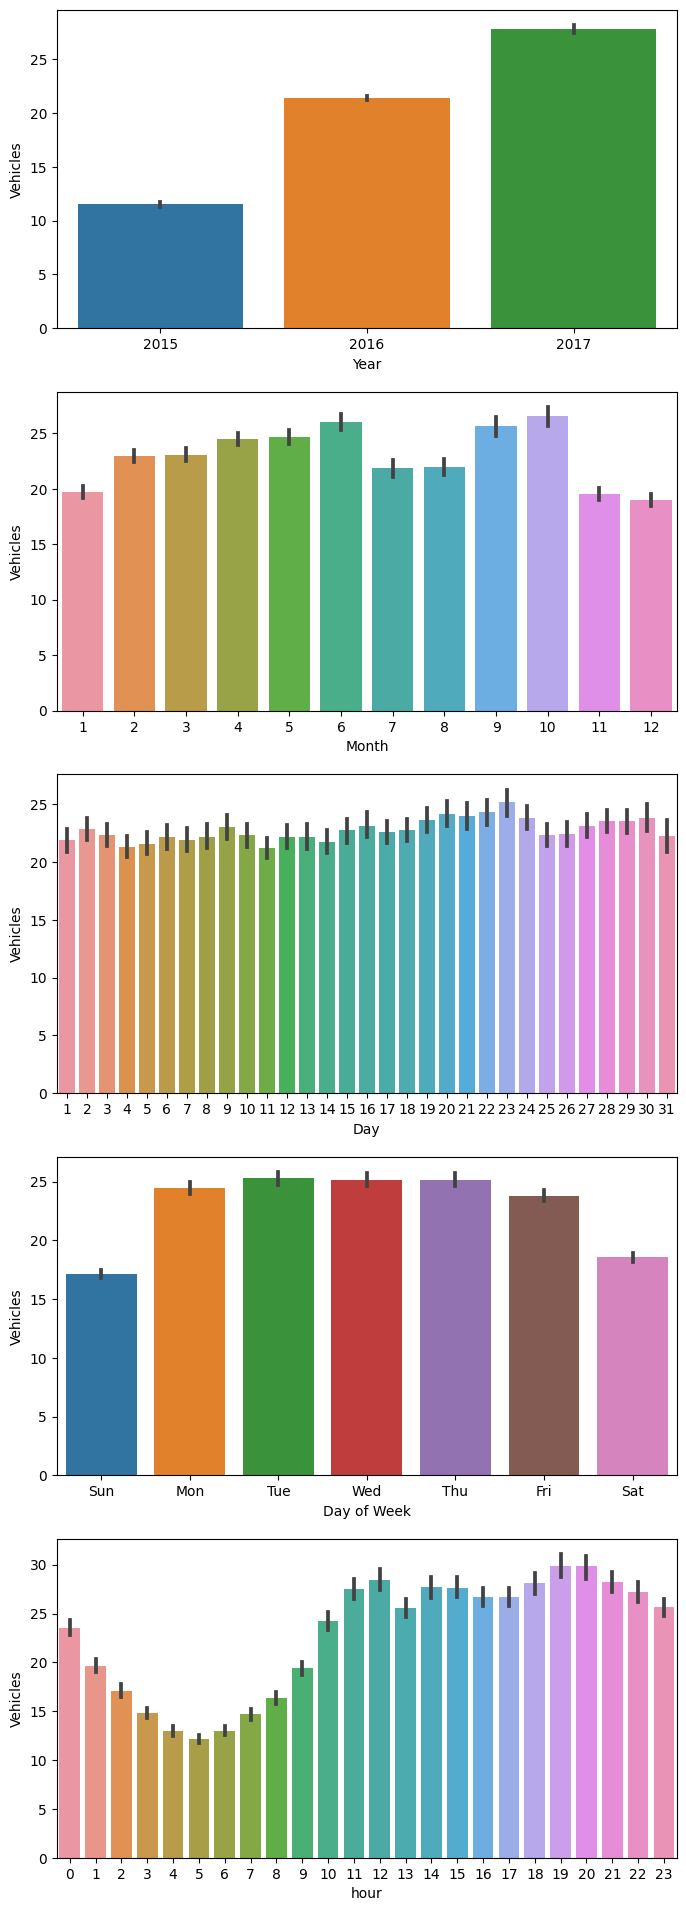

In [282]:
# date(year,month,day,dayofweek,hour)

plt.figure(figsize=(8,24))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=data)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=data)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=data)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=data)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=data)

<Axes: xlabel='hour', ylabel='Vehicles'>

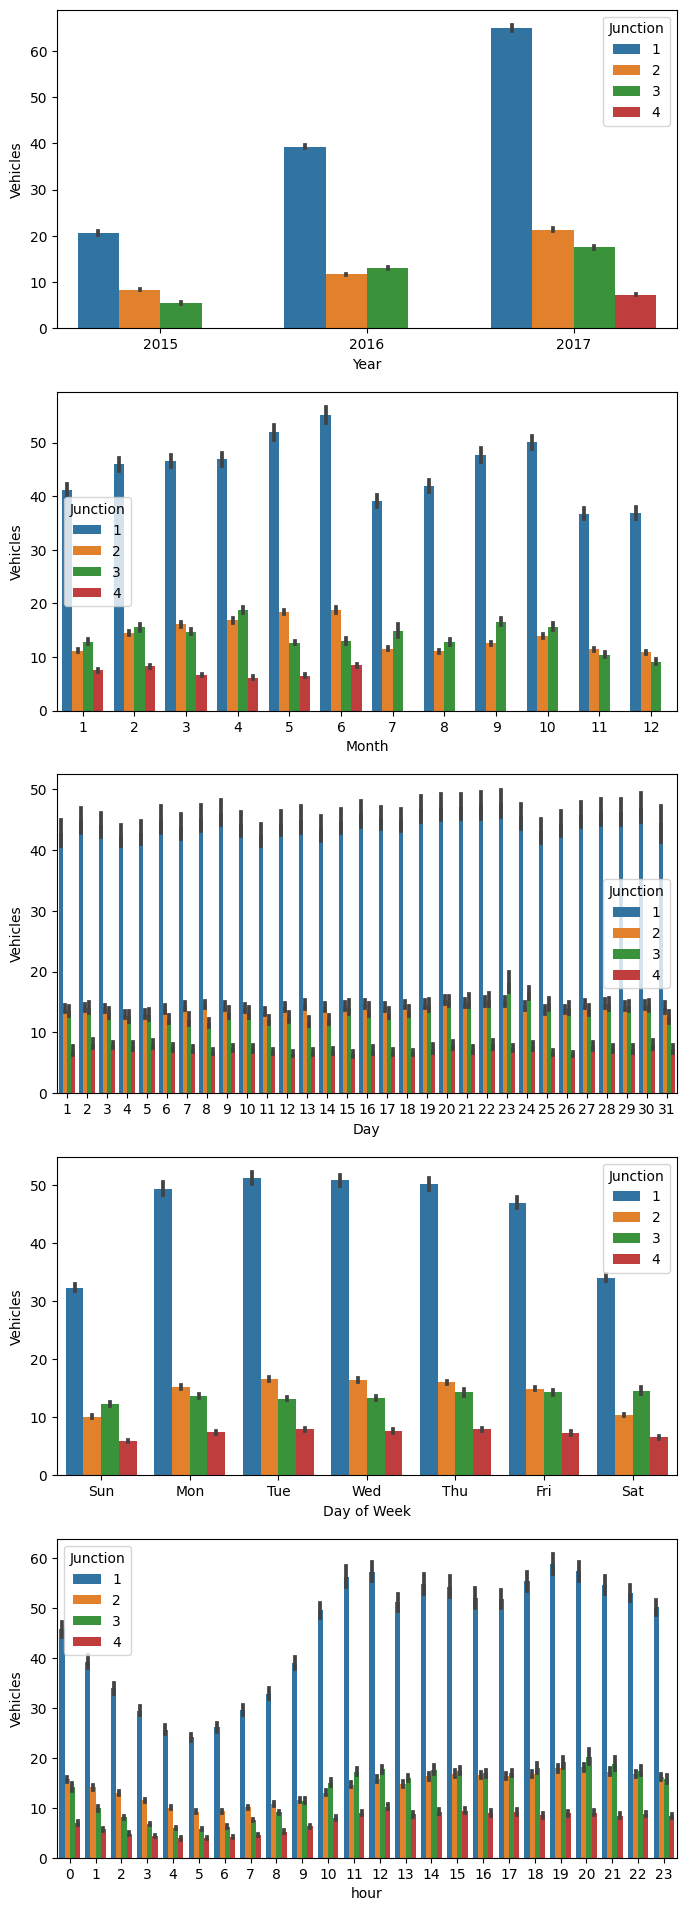

In [283]:
# date(year,month,day,dayofweek,hour) vs vehicles {overall data}

plt.figure(figsize=(8,24))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',hue='Junction',data=data)

<Axes: xlabel='W/H', ylabel='Vehicles'>

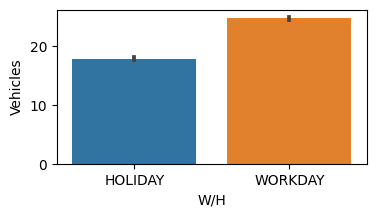

In [284]:
#vehicles vs typeofdays {overalldata}
plt.figure(figsize=(4,2))
sns.barplot(x='W/H',y='Vehicles',data=data)

<Axes: xlabel='W/H', ylabel='Vehicles'>

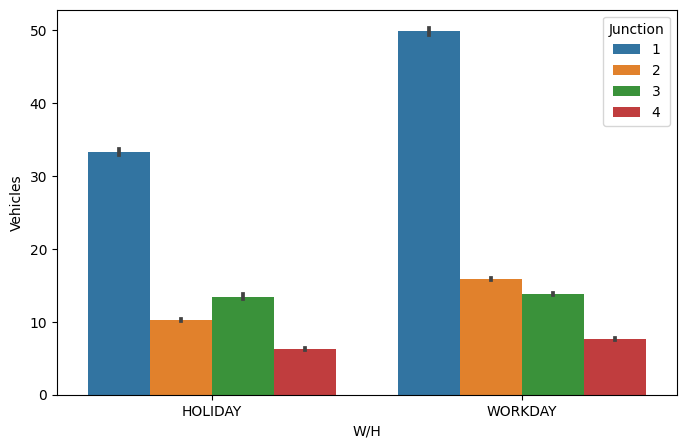

In [285]:
#vehicles vs junction(typeofdays)  {overall data}
plt.figure(figsize=(8,5))
sns.barplot(x='W/H',y='Vehicles',hue='Junction',data=data)


<Axes: xlabel='hour', ylabel='Vehicles'>

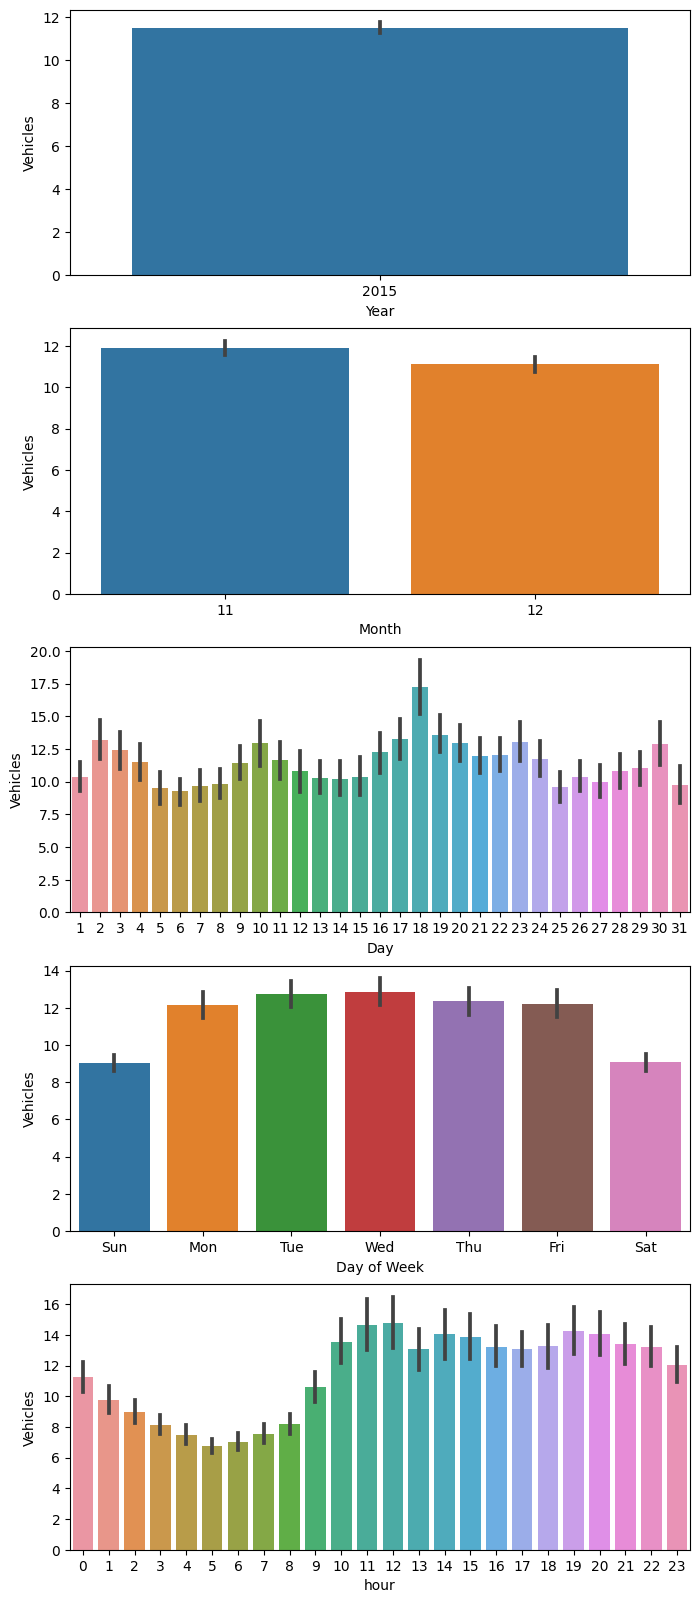

In [286]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2015}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2015)

<Axes: xlabel='hour', ylabel='Vehicles'>

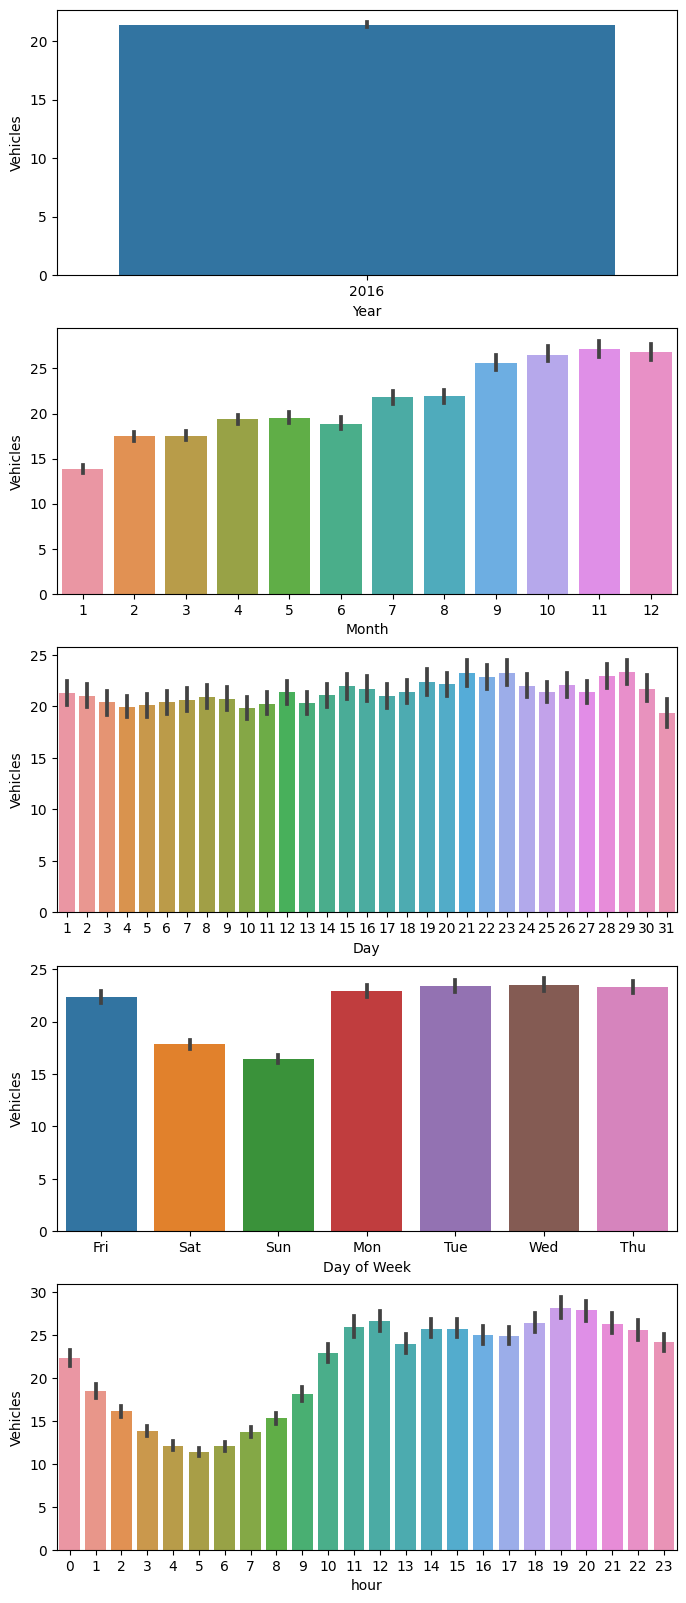

In [287]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2016}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2016)

<Axes: xlabel='hour', ylabel='Vehicles'>

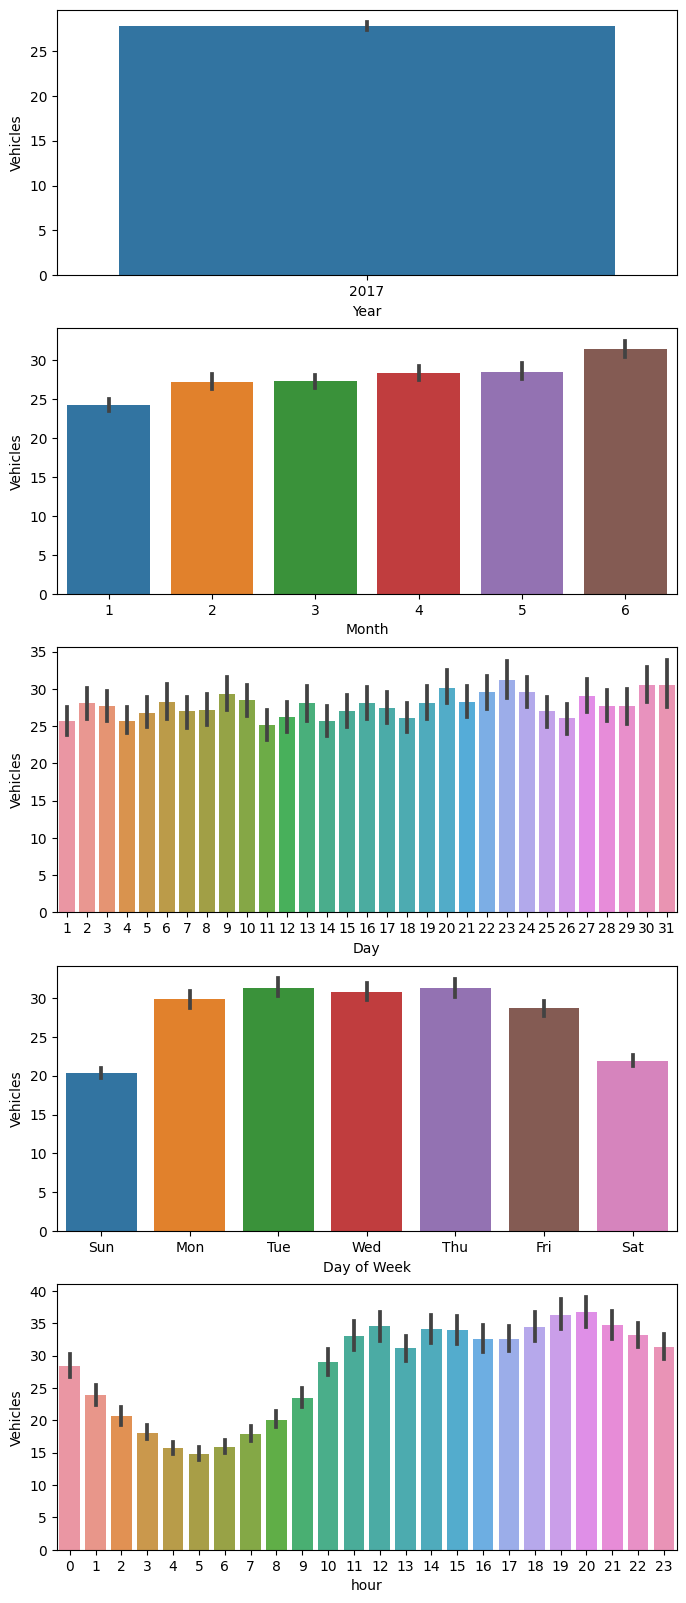

In [288]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2017}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2017)

Text(0.5, 0, 'Date')

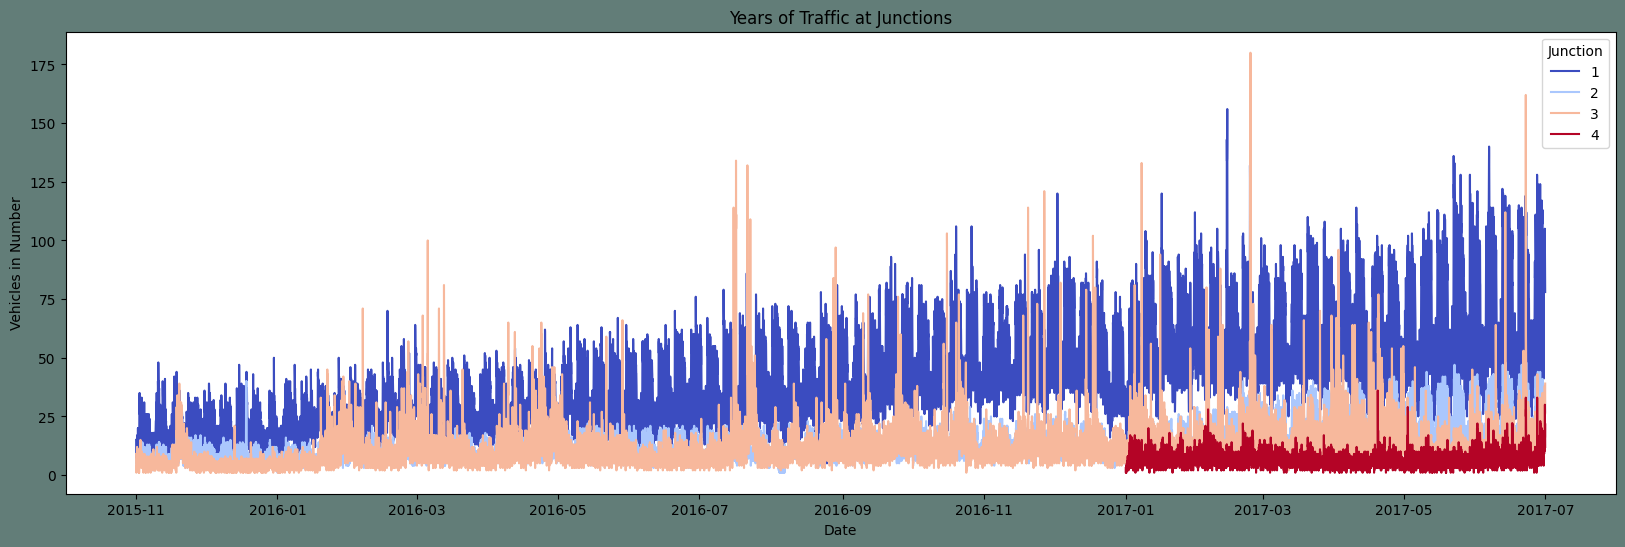

In [289]:
#timeseries plot of data
plt.figure(figsize=(20,6),facecolor="#627D78")  
Time_series=sns.lineplot(x=data['DateTime'],y="Vehicles",data=data, hue="Junction", palette='coolwarm')  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

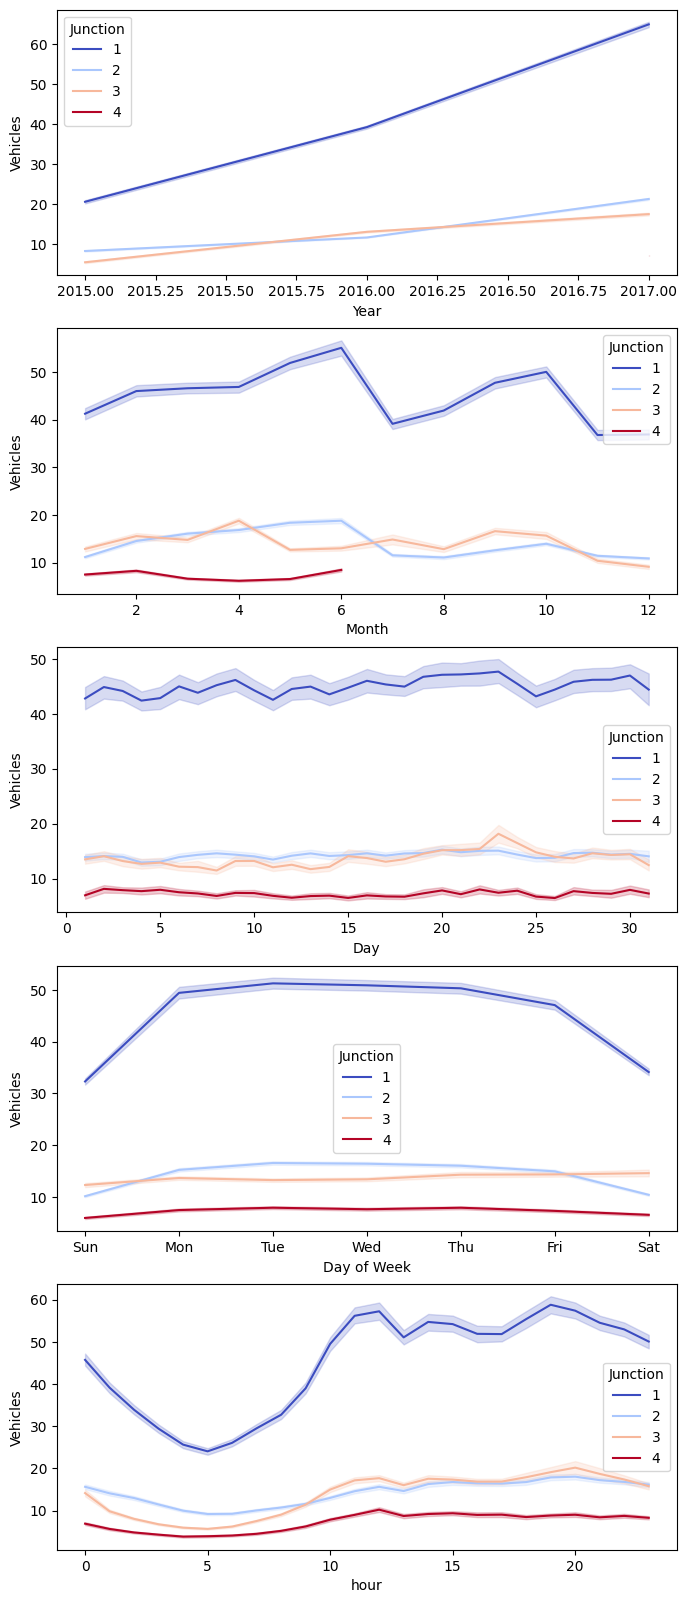

In [290]:
#Time series plot (Year , Month, Day,Day of Week,hour vs vehicles)
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
ax=sns.lineplot(x=data['Year'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,2)
ax=sns.lineplot(x=data['Month'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,3)
ax=sns.lineplot(x=data['Day'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,4)
ax=sns.lineplot(x=data['Day of Week'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,5)
ax=sns.lineplot(x=data['hour'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )


# Exploratory Data Analysis

In [291]:
#correlation matrix
data[['Junction', 'Vehicles', 'Year', 'Month','Day','hour']].corr()

Junction  Vehicles          Year         Month           Day  \
Junction  1.000000e+00 -0.613787  2.212977e-01 -1.242771e-01 -2.094621e-03   
Vehicles -6.137872e-01  1.000000  2.212531e-01 -2.272345e-02  2.789498e-02   
Year      2.212977e-01  0.221253  1.000000e+00 -6.234957e-01 -7.474779e-03   
Month    -1.242771e-01 -0.022723 -6.234957e-01  1.000000e+00  9.154760e-03   
Day      -2.094621e-03  0.027895 -7.474779e-03  9.154760e-03  1.000000e+00   
hour     -2.132575e-15  0.219938  7.732006e-16  4.953278e-16 -9.917806e-18   

                  hour  
Junction -2.132575e-15  
Vehicles  2.199377e-01  
Year      7.732006e-16  
Month     4.953278e-16  
Day      -9.917806e-18  
hour      1.000000e+00

<Axes: >

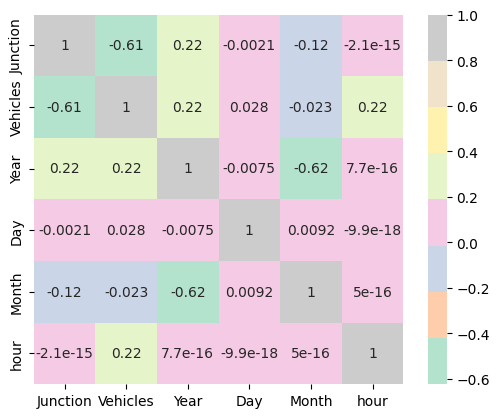

In [292]:
#heatmap
sns.heatmap(data[['Junction', 'Vehicles', 'Year','Day', 'Month','hour']].corr(),annot=True,cmap='Pastel2',square=True)

Text(0.5, 0, 'Date')

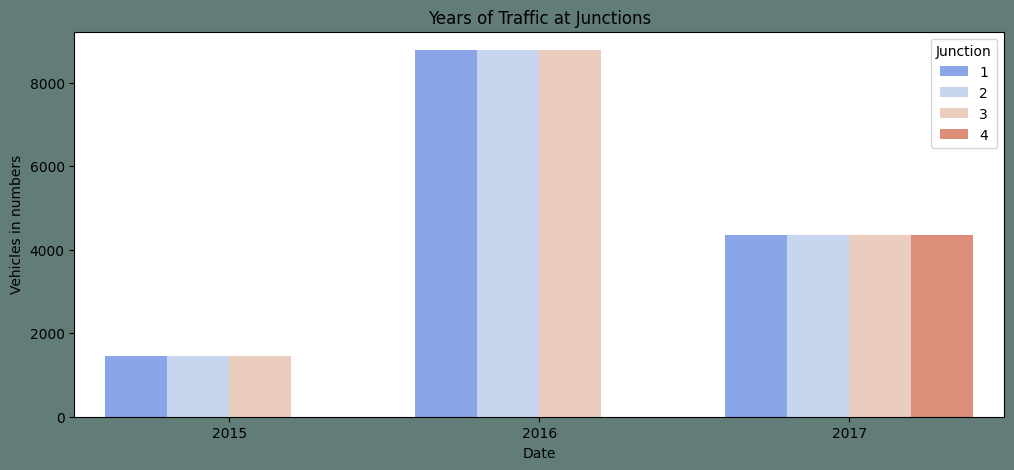

In [293]:
#countplot vehicles in year from given data

plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette='coolwarm')  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date")  

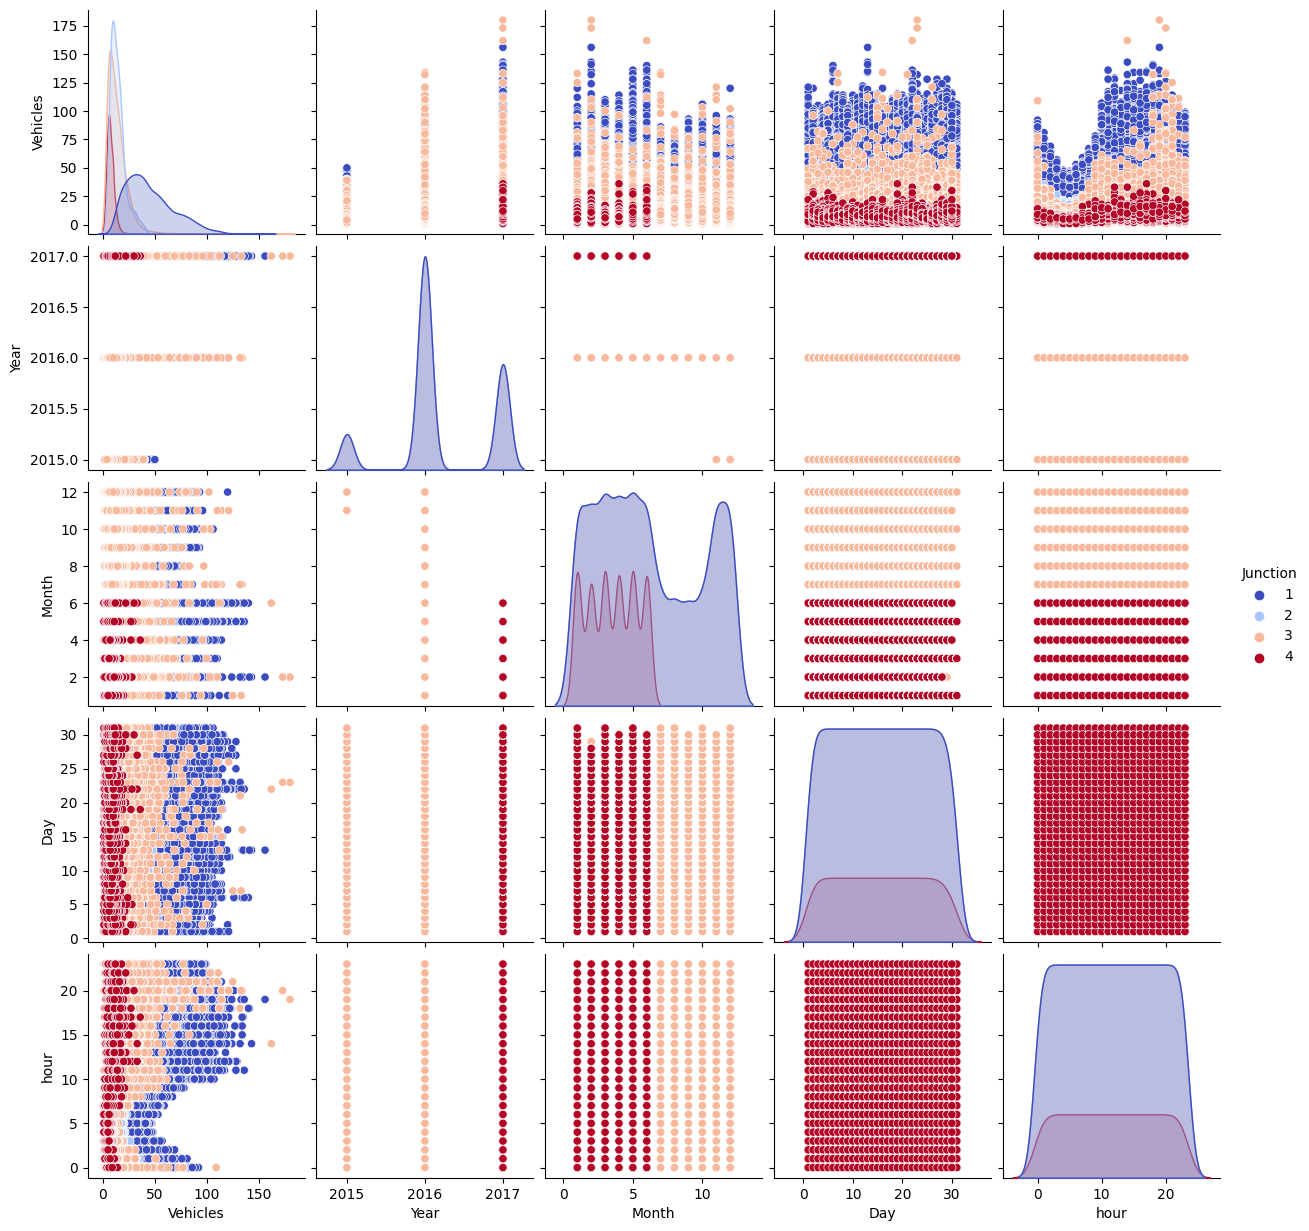

In [294]:
#pairplot of data (at each junctions)
sns.pairplot(data=data, hue= "Junction",palette='coolwarm')  


# Feature Engineering and EDA according to junction

In [295]:
data_junction = data.pivot(columns="Junction", index="DateTime",values='Vehicles')  

In [297]:
data_junction.head()

Junction                1    2    3   4
DateTime                               
2015-11-01 00:00:00  15.0  6.0  9.0 NaN
2015-11-01 01:00:00  13.0  6.0  7.0 NaN
2015-11-01 02:00:00  10.0  5.0  5.0 NaN
2015-11-01 03:00:00   7.0  6.0  1.0 NaN
2015-11-01 04:00:00   9.0  7.0  2.0 NaN

In [298]:
data_junction.describe()

Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

In [299]:
#creating dataframe of each junctions

dataframe_1 = data_junction[1]
dataframe_2 = data_junction[2]  
dataframe_3 = data_junction[3]  
dataframe_4 = data_junction[4]  

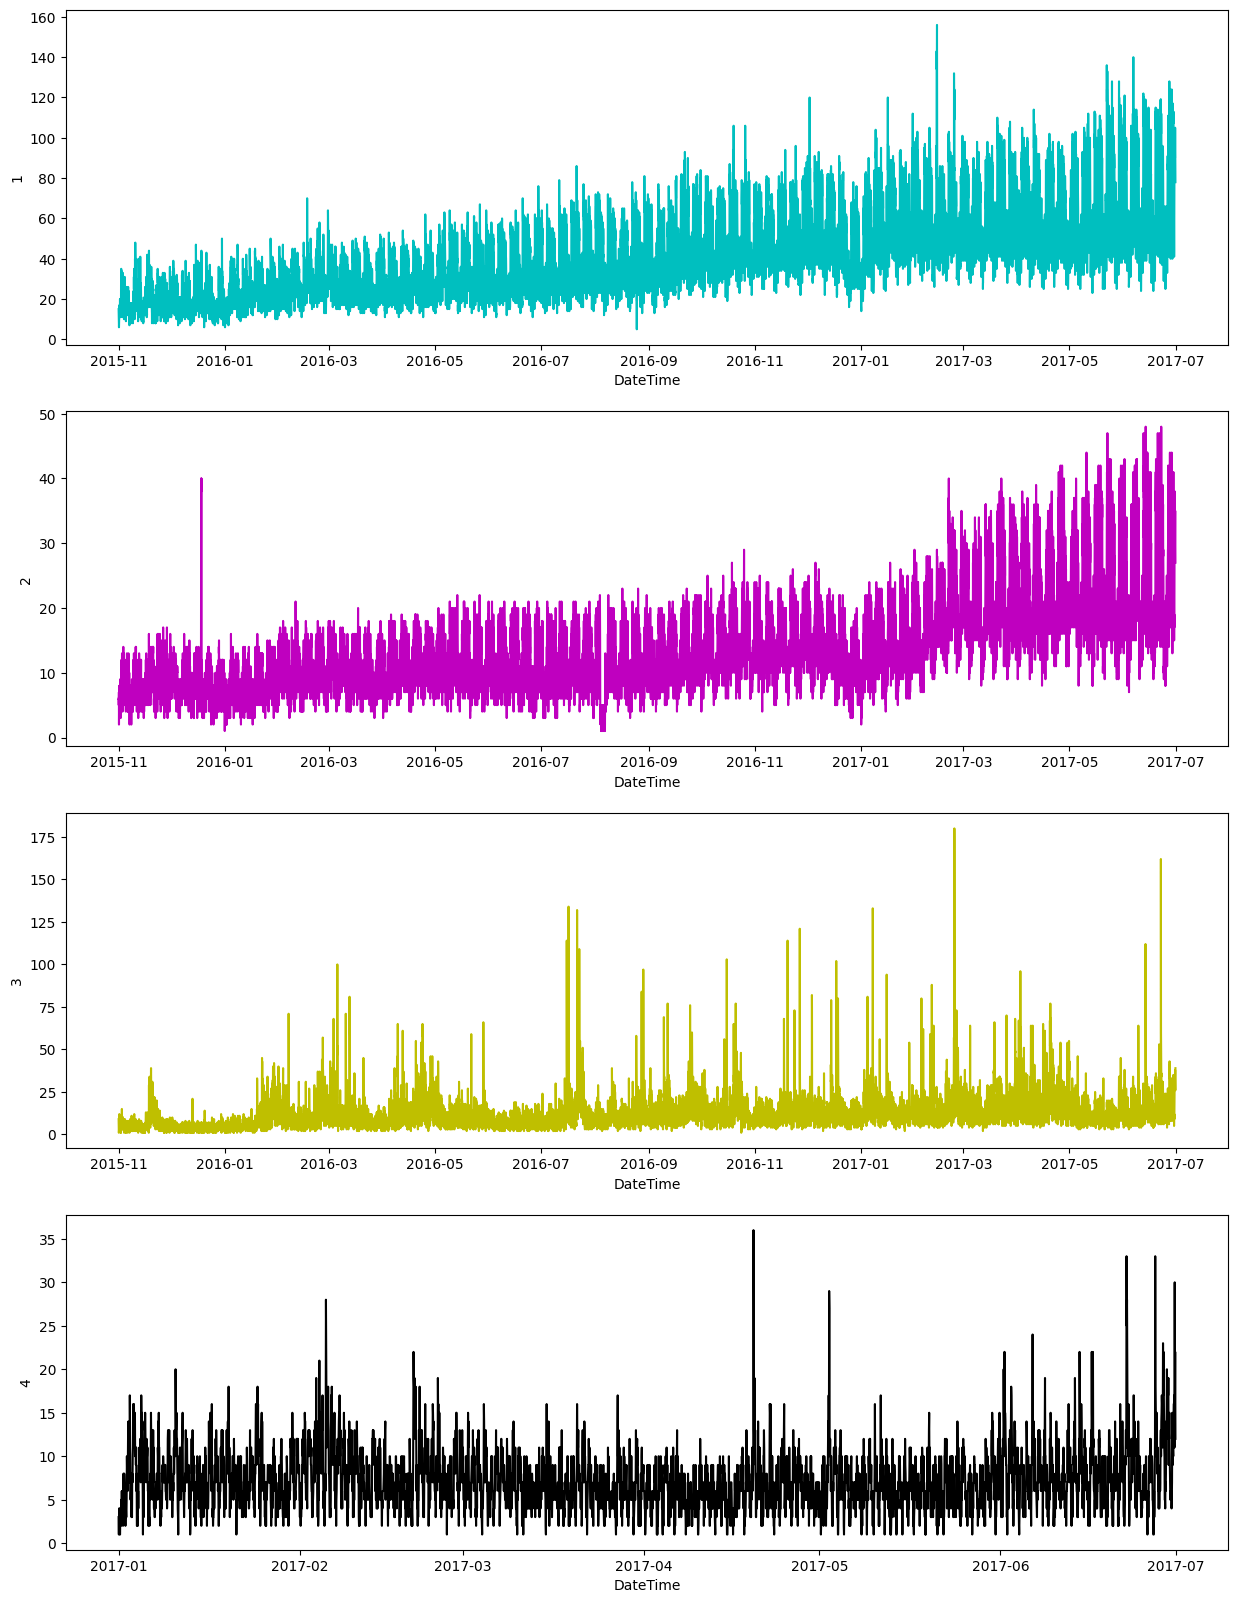

In [300]:
#timeseries plot at each junction

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax=sns.lineplot(data=dataframe_1,color='c')

plt.subplot(4,1,2)
ax=sns.lineplot(data=dataframe_2,color='m')

plt.subplot(4,1,3)
ax=sns.lineplot(data=dataframe_3,color='y')

plt.subplot(4,1,4)
ax=sns.lineplot(data=dataframe_4,color='k')

ax=sns.lineplot()


# Model Selection and evaluation

In [46]:
#preprocess the data for model selection

train_df = pd.read_csv("train_aWnotuB.csv")
test_df = pd.read_csv("datasets_8494_11879_test_BdBKkAj.csv")
def preprocess_data(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['Hour'] = df['DateTime'].dt.hour
    df['Day'] = df['DateTime'].dt.day
    df['Month'] = df['DateTime'].dt.month
    df['Year'] = df['DateTime'].dt.year
    df['Day of week']=df['DateTime'].dt.dayofweek
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [47]:
tmap={0:'WORKDAY',1:'WORKDAY',2:'WORKDAY',3:'WORKDAY',4:'WORKDAY',5:'HOLIDAY',6:'HOLIDAY'}
train_df['W/H']=train_df['Day of week'].map(tmap)
test_df['W/H']=test_df['Day of week'].map(tmap)

wmap={'WORKDAY':1,'HOLIDAY':0}
train_df['W/H']=train_df['W/H'].map(wmap)
test_df['W/H']=test_df['W/H'].map(wmap)

# Linear Regression Model

In [301]:
#Using Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year','Day of week','W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=0)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)


In [302]:
# Print accuracy metrics for Linear Regression
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 9.475002580485857
RMSE: 12.09939099947197

Junction: 2
MAE: 3.367256282161323
RMSE: 4.430184915879733

Junction: 3
MAE: 5.629009482253869
RMSE: 8.749302530348356

Junction: 4
MAE: 2.3576551360401847
RMSE: 3.2634036132930206



accuracy metrics are large for Linear Regression model

# Logistic Regression Model 

In [415]:
#Using Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year','Day of week','W/H']
    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=0)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)


In [416]:
# Print accuracy metrics
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 19.69304556354916
RMSE: 26.183150739842148

Junction: 2
MAE: 5.53100376841384
RMSE: 7.879031456381392

Junction: 3
MAE: 6.592668722165125
RMSE: 10.515099503785583

Junction: 4
MAE: 2.4016110471806673
RMSE: 3.46027929455378



accuracy metrics are relatively large for Logistic Regression

# Random Forest Regressor

In [359]:
dataframe_4.dropna(inplace=True)

In [360]:
#ADFULLERS TEST

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(dataframe_1.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_2.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_3.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_4.values)
print('p-value: %f' % result[1])

p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000


Since the p-value is below 0.05, the data can be assumed to be stationary

In [306]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)

# Print accuracy metrics
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 2.852182254196643
RMSE: 3.977159489122666

Junction: 2
MAE: 1.7779239465570402
RMSE: 2.248420038320724

Junction: 3
MAE: 2.928283658787256
RMSE: 5.565888558936187

Junction: 4
MAE: 1.8990678941311852
RMSE: 2.6096021018604585



 RFG has a pretty good accuracy 

In [407]:


def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data[target])

    # Predict using the trained model on training data
    y_train_pred = model.predict(train_data[features])

    # Plot the predicted values and original values for training data
    plt.plot(train_data[target], label='Original (Training)')
    plt.plot(y_train_pred, label='Predicted (Training)')
    plt.ylabel('Number of Vehicles')
    plt.title('Predicted vs. Original (Training Data)')
    plt.legend()
    plt.show()

    # Calculate accuracy metrics for training data
    mae_train = mean_absolute_error(train_data[target], y_train_pred)
    rmse_train = mean_squared_error(train_data[target], y_train_pred, squared=False)
    
    # ...

    return mae_train, rmse_train


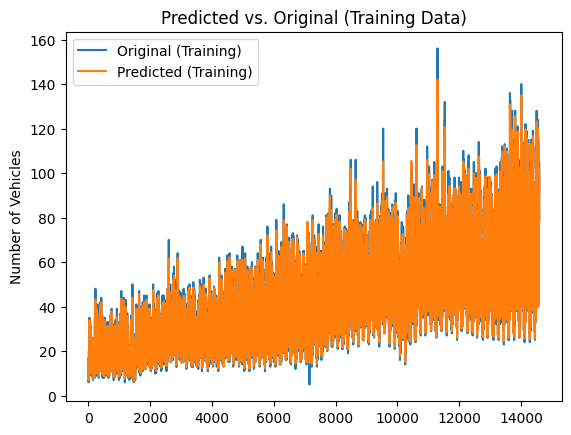

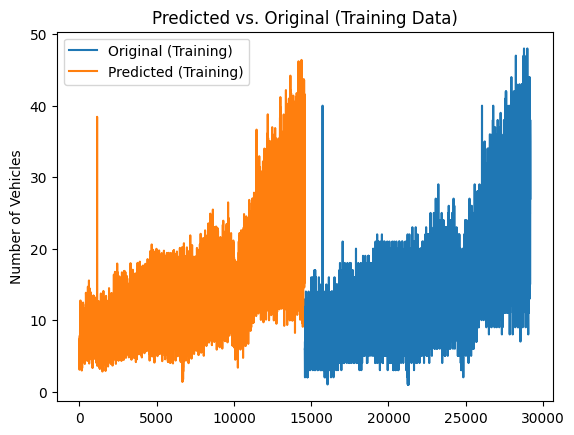

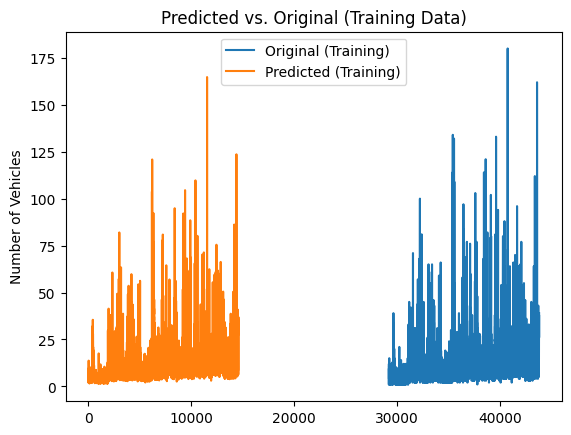

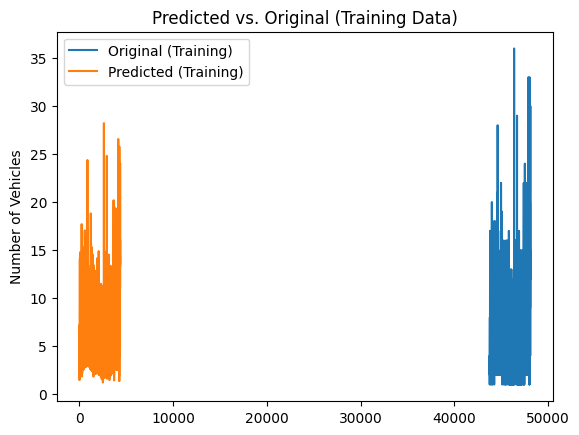

In [408]:
# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)

In [365]:
def train_and_predict(train_df, test_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]
    
    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']
    
    # Create the target variable (number of vehicles)
    target = 'Vehicles'
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data[target])
    
    # Make predictions for the test dataset
    test_data = test_df[test_df['Junction'] == junction]
    test_data['Predicted_Vehicles'] = model.predict(test_data[features])
    
    return test_data[['DateTime', 'Junction', 'Predicted_Vehicles']]

# Predict vehicles for each junction
junctions = [1, 2, 3, 4]
predictions = pd.DataFrame()

for junction in junctions:
    junction_predictions = train_and_predict(train_df, test_df, junction)
    predictions = pd.concat([predictions, junction_predictions])

# Save predictions to a new CSV file
predictions.to_csv('traffic_predictions_rscp.csv', index=False)

In [409]:
p=pd.read_csv('traffic_predictions_rscp.csv')
p['DateTime'] = pd.to_datetime(p['DateTime'])

In [410]:
pdf = p.pivot(columns="Junction", index="DateTime",values='Predicted_Vehicles')  

In [411]:
pred_dataframe_1 = pdf[1]
pred_dataframe_2 = pdf[2]  
pred_dataframe_3 = pdf[3]  
pred_dataframe_4 = pdf[4] 

Text(0.5, 0, 'Date')

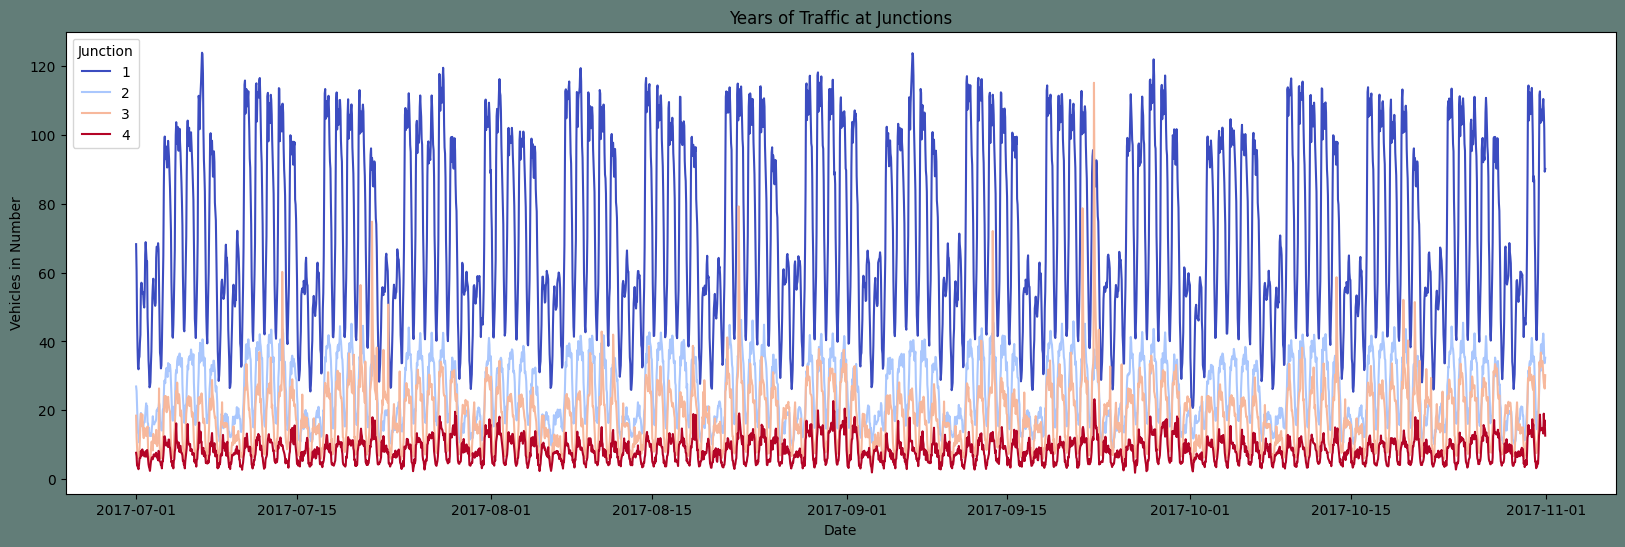

In [412]:
#timeseries plot of data
plt.figure(figsize=(20,6),facecolor="#627D78")  
Time_series=sns.lineplot(x='DateTime',y="Predicted_Vehicles",data=p, hue="Junction", palette='coolwarm')  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

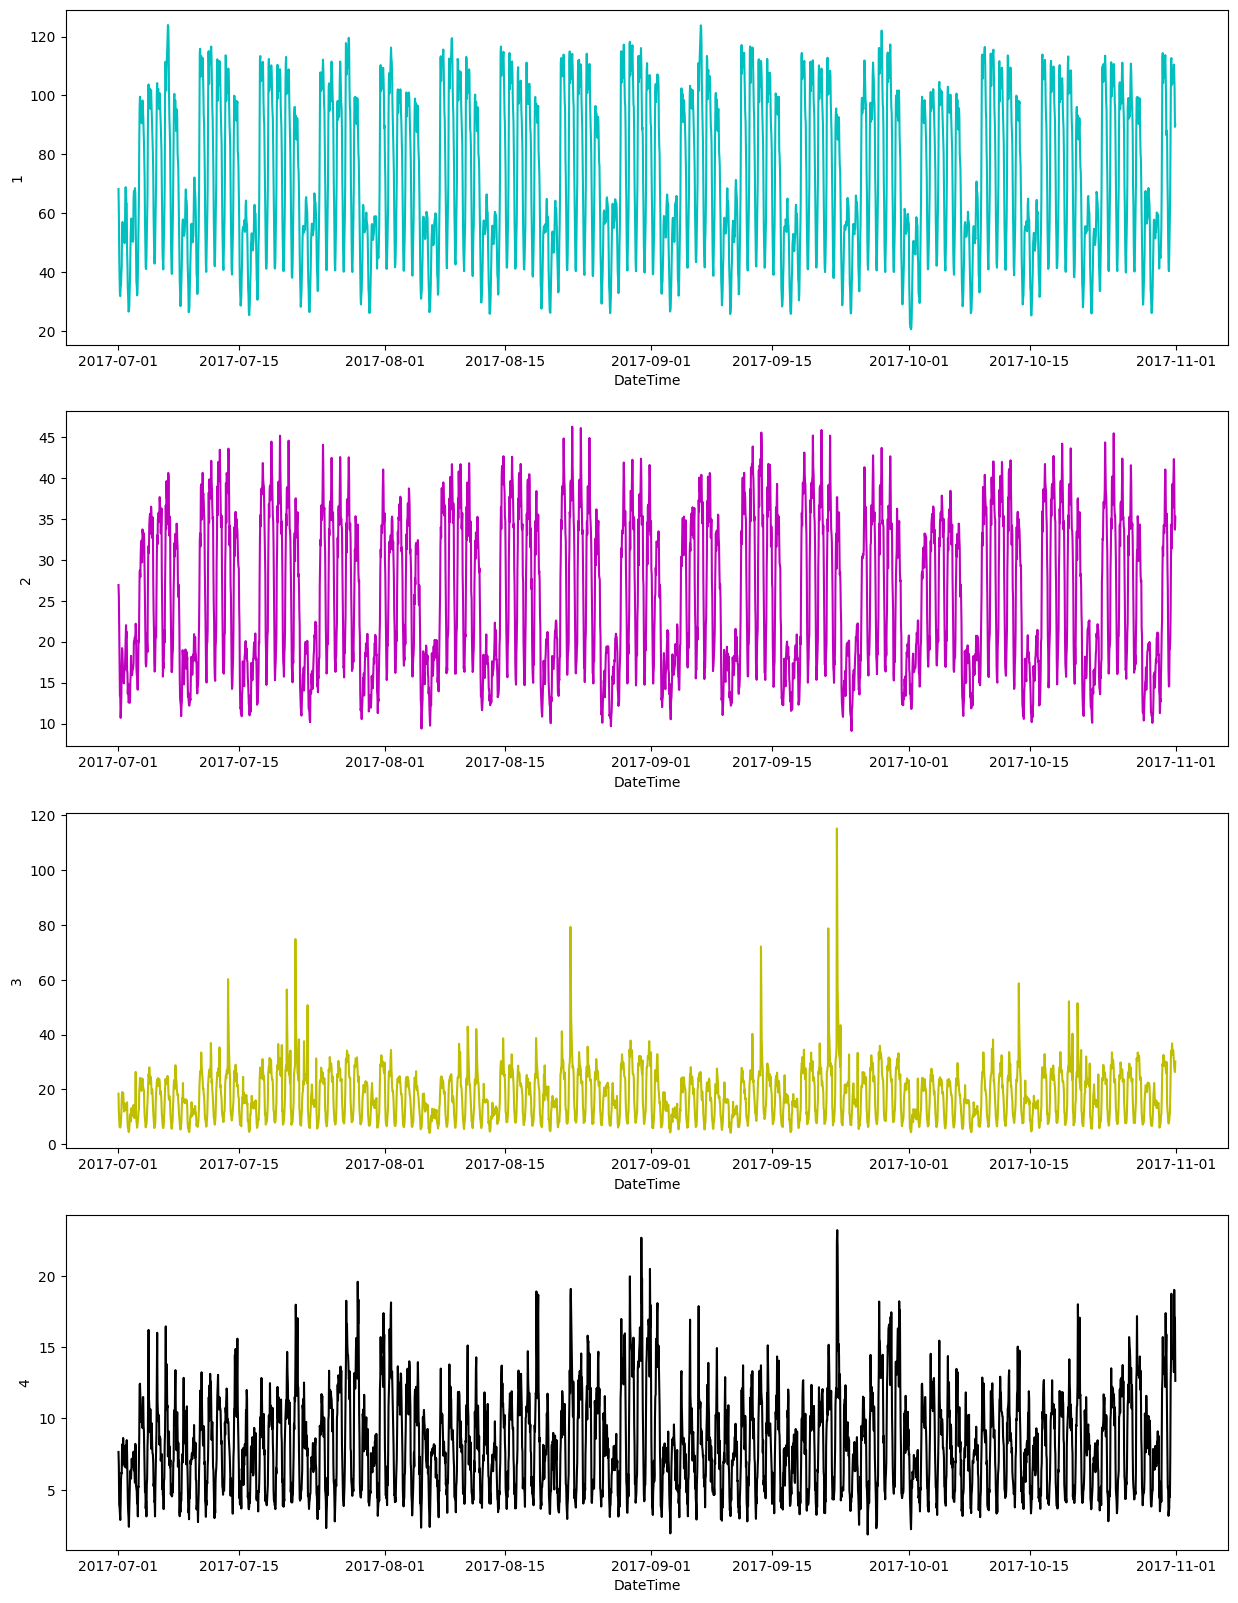

In [413]:

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax=sns.lineplot(data=pred_dataframe_1,color='c')

plt.subplot(4,1,2)
ax=sns.lineplot(data=pred_dataframe_2,color='m')

plt.subplot(4,1,3)
ax=sns.lineplot(data=pred_dataframe_3,color='y')

plt.subplot(4,1,4)
ax=sns.lineplot(data=pred_dataframe_4,color='k')

ax=sns.lineplot()

"To achieve improved results, the evaluation of feature-target relationships in the dataset was conducted. Furthermore, a time series forecasting approach was implemented to enhance the accuracy of predictions.

# TIME SERIES FORECASTING

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train_aWnotuB.csv',parse_dates=[0],infer_datetime_format=True)
df_test = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv',parse_dates=[0],infer_datetime_format=True)

In [3]:
print("Size of training set: "+ str(df_train.shape))
print("Size of test set: "+ str(df_test.shape))
print('\n')
print('columns in train: '+str(df_train.columns.tolist()))
print('columns in test: '+str(df_test.columns.tolist()))

df_train.head()

Size of training set: (48120, 4)
Size of test set: (11808, 3)


columns in train: ['DateTime', 'Junction', 'Vehicles', 'ID']
columns in test: ['DateTime', 'Junction', 'ID']


DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1        15  20151101001
1 2015-11-01 01:00:00         1        13  20151101011
2 2015-11-01 02:00:00         1        10  20151101021
3 2015-11-01 03:00:00         1         7  20151101031
4 2015-11-01 04:00:00         1         9  20151101041

# QUICK EDA

In [4]:
df_tmp = df_train.set_index(['Junction','DateTime'])

In [5]:
level_values = df_tmp.index.get_level_values

In [6]:
time_targets = df_tmp.groupby([level_values(0)] + [pd.Grouper(freq='1M', level=-1)])['Vehicles'].sum()
time_targets

Junction  DateTime  
1         2015-11-30    14736
          2015-12-31    15487
          2016-01-31    17940
          2016-02-29    20813
          2016-03-31    22215
                        ...  
4         2017-02-28     5564
          2017-03-31     4931
          2017-04-30     4454
          2017-05-31     4877
          2017-06-30     6097
Name: Vehicles, Length: 66, dtype: int64

In [7]:
del df_tmp
del time_targets

# Lag Features

In [8]:
train = df_train.pivot(index='DateTime', columns='Junction', values='Vehicles')
train

Junction                 1     2     3     4
DateTime                                    
2015-11-01 00:00:00   15.0   6.0   9.0   NaN
2015-11-01 01:00:00   13.0   6.0   7.0   NaN
2015-11-01 02:00:00   10.0   5.0   5.0   NaN
2015-11-01 03:00:00    7.0   6.0   1.0   NaN
2015-11-01 04:00:00    9.0   7.0   2.0   NaN
...                    ...   ...   ...   ...
2017-06-30 19:00:00  105.0  34.0  33.0  11.0
2017-06-30 20:00:00   96.0  35.0  31.0  30.0
2017-06-30 21:00:00   90.0  31.0  28.0  16.0
2017-06-30 22:00:00   84.0  29.0  26.0  22.0
2017-06-30 23:00:00   78.0  27.0  39.0  12.0

[14592 rows x 4 columns]

In [9]:
train.isnull().sum()

Junction
1        0
2        0
3        0
4    10248
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14592 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       14592 non-null  float64
 1   2       14592 non-null  float64
 2   3       14592 non-null  float64
 3   4       4344 non-null   float64
dtypes: float64(4)
memory usage: 570.0 KB


In [11]:
value=round(train[4].max())/1.0
value

36.0

In [12]:
train = train.fillna(value)

# Generate lag features

In [13]:
def gen_lag_features(df, n_in=1,n_out=1,dropnan=True):
    n_vars = df.shape[1]
    cols, names = list(), list()
    #input sequence (t-n,.....t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names+=[('Junction %d (H-%d)' %(j+1, i)) for j in range(n_vars)]
    # forecast sequence (t,t+1,.....t+n)
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names+=[('Junction %d (H)' %(j+1)) for j in range(n_vars)]
        else:
            names+=[('Junction %d (H+%d)' %(j+1,i)) for j in range(n_vars)]
    #put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [14]:
Xy_train= gen_lag_features(train)
Xy_train

Junction 1 (H-1)  Junction 2 (H-1)  Junction 3 (H-1)  \
DateTime                                                                    
2015-11-01 01:00:00              15.0               6.0               9.0   
2015-11-01 02:00:00              13.0               6.0               7.0   
2015-11-01 03:00:00              10.0               5.0               5.0   
2015-11-01 04:00:00               7.0               6.0               1.0   
2015-11-01 05:00:00               9.0               7.0               2.0   
...                               ...               ...               ...   
2017-06-30 19:00:00              95.0              34.0              38.0   
2017-06-30 20:00:00             105.0              34.0              33.0   
2017-06-30 21:00:00              96.0              35.0              31.0   
2017-06-30 22:00:00              90.0              31.0              28.0   
2017-06-30 23:00:00              84.0              29.0              26.0   

                     Junction 4 (H-1)  Junction 1 (H)  Junction 2 (H)  \
DateTime                                                                
2015-11-01 01:00:00              36.0            13.0             6.0   
2015-11-01 02:00:00              36.0            10.0             5.0   
2015-11-01 03:00:00              36.0             7.0             6.0   
2015-11-01 04:00:00              36.0             9.0             7.0   
2015-11-01 05:00:00              36.0             6.0             2.0   
...                               ...             ...             ...   
2017-06-30 19:00:00              17.0           105.0            34.0   
2017-06-30 20:00:00              11.0            96.0            35.0   
2017-06-30 21:00:00              30.0            90.0            31.0   
2017-06-30 22:00:00              16.0            84.0            29.0   
2017-06-30 23:00:00              22.0            78.0            27.0   

                     Junction 3 (H)  Junction 4 (H)  
DateTime                                             
2015-11-01 01:00:00             7.0            36.0  
2015-11-01 02:00:00             5.0            36.0  
2015-11-01 03:00:00             1.0            36.0  
2015-11-01 04:00:00             2.0            36.0  
2015-11-01 05:00:00             2.0            36.0  
...                             ...             ...  
2017-06-30 19:00:00            33.0            11.0  
2017-06-30 20:00:00            31.0            30.0  
2017-06-30 21:00:00            28.0            16.0  
2017-06-30 22:00:00            26.0            22.0  
2017-06-30 23:00:00            39.0            12.0  

[14591 rows x 8 columns]

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
Xy_train[Xy_train.columns]= scaler.fit_transform(Xy_train[Xy_train.columns])

Xy_train

Junction 1 (H-1)  Junction 2 (H-1)  Junction 3 (H-1)  \
DateTime                                                                    
2015-11-01 01:00:00          0.066225          0.106383          0.044693   
2015-11-01 02:00:00          0.052980          0.106383          0.033520   
2015-11-01 03:00:00          0.033113          0.085106          0.022346   
2015-11-01 04:00:00          0.013245          0.106383          0.000000   
2015-11-01 05:00:00          0.026490          0.127660          0.005587   
...                               ...               ...               ...   
2017-06-30 19:00:00          0.596026          0.702128          0.206704   
2017-06-30 20:00:00          0.662252          0.702128          0.178771   
2017-06-30 21:00:00          0.602649          0.723404          0.167598   
2017-06-30 22:00:00          0.562914          0.638298          0.150838   
2017-06-30 23:00:00          0.523179          0.595745          0.139665   

                     Junction 4 (H-1)  Junction 1 (H)  Junction 2 (H)  \
DateTime                                                                
2015-11-01 01:00:00          1.000000        0.052980        0.106383   
2015-11-01 02:00:00          1.000000        0.033113        0.085106   
2015-11-01 03:00:00          1.000000        0.013245        0.106383   
2015-11-01 04:00:00          1.000000        0.026490        0.127660   
2015-11-01 05:00:00          1.000000        0.006623        0.021277   
...                               ...             ...             ...   
2017-06-30 19:00:00          0.457143        0.662252        0.702128   
2017-06-30 20:00:00          0.285714        0.602649        0.723404   
2017-06-30 21:00:00          0.828571        0.562914        0.638298   
2017-06-30 22:00:00          0.428571        0.523179        0.595745   
2017-06-30 23:00:00          0.600000        0.483444        0.553191   

                     Junction 3 (H)  Junction 4 (H)  
DateTime                                             
2015-11-01 01:00:00        0.033520        1.000000  
2015-11-01 02:00:00        0.022346        1.000000  
2015-11-01 03:00:00        0.000000        1.000000  
2015-11-01 04:00:00        0.005587        1.000000  
2015-11-01 05:00:00        0.005587        1.000000  
...                             ...             ...  
2017-06-30 19:00:00        0.178771        0.285714  
2017-06-30 20:00:00        0.167598        0.828571  
2017-06-30 21:00:00        0.150838        0.428571  
2017-06-30 22:00:00        0.139665        0.600000  
2017-06-30 23:00:00        0.212291        0.314286  

[14591 rows x 8 columns]

# Split train and valid (and normalize for real)

In [16]:
X_train = Xy_train[Xy_train.index < '2017-04-01'].iloc[:,0:4]
X_train

Junction 1 (H-1)  Junction 2 (H-1)  Junction 3 (H-1)  \
DateTime                                                                    
2015-11-01 01:00:00          0.066225          0.106383          0.044693   
2015-11-01 02:00:00          0.052980          0.106383          0.033520   
2015-11-01 03:00:00          0.033113          0.085106          0.022346   
2015-11-01 04:00:00          0.013245          0.106383          0.000000   
2015-11-01 05:00:00          0.026490          0.127660          0.005587   
...                               ...               ...               ...   
2017-03-31 19:00:00          0.476821          0.574468          0.178771   
2017-03-31 20:00:00          0.496689          0.531915          0.156425   
2017-03-31 21:00:00          0.483444          0.638298          0.156425   
2017-03-31 22:00:00          0.403974          0.574468          0.150838   
2017-03-31 23:00:00          0.423841          0.553191          0.162011   

                     Junction 4 (H-1)  
DateTime                               
2015-11-01 01:00:00          1.000000  
2015-11-01 02:00:00          1.000000  
2015-11-01 03:00:00          1.000000  
2015-11-01 04:00:00          1.000000  
2015-11-01 05:00:00          1.000000  
...                               ...  
2017-03-31 19:00:00          0.142857  
2017-03-31 20:00:00          0.200000  
2017-03-31 21:00:00          0.200000  
2017-03-31 22:00:00          0.228571  
2017-03-31 23:00:00          0.142857  

[12407 rows x 4 columns]

In [17]:
y_train= Xy_train[Xy_train.index < '2017-04-01'].iloc[:,4:]
y_train

Junction 1 (H)  Junction 2 (H)  Junction 3 (H)  \
DateTime                                                              
2015-11-01 01:00:00        0.052980        0.106383        0.033520   
2015-11-01 02:00:00        0.033113        0.085106        0.022346   
2015-11-01 03:00:00        0.013245        0.106383        0.000000   
2015-11-01 04:00:00        0.026490        0.127660        0.005587   
2015-11-01 05:00:00        0.006623        0.021277        0.005587   
...                             ...             ...             ...   
2017-03-31 19:00:00        0.496689        0.531915        0.156425   
2017-03-31 20:00:00        0.483444        0.638298        0.156425   
2017-03-31 21:00:00        0.403974        0.574468        0.150838   
2017-03-31 22:00:00        0.423841        0.553191        0.162011   
2017-03-31 23:00:00        0.417219        0.553191        0.162011   

                     Junction 4 (H)  
DateTime                             
2015-11-01 01:00:00        1.000000  
2015-11-01 02:00:00        1.000000  
2015-11-01 03:00:00        1.000000  
2015-11-01 04:00:00        1.000000  
2015-11-01 05:00:00        1.000000  
...                             ...  
2017-03-31 19:00:00        0.200000  
2017-03-31 20:00:00        0.200000  
2017-03-31 21:00:00        0.228571  
2017-03-31 22:00:00        0.142857  
2017-03-31 23:00:00        0.142857  

[12407 rows x 4 columns]

# Reshape the Data

In [18]:
print(X_train.shape, y_train.shape)

(12407, 4) (12407, 4)


In [19]:
X_train = np.expand_dims(X_train.values,axis=2)
print(X_train.shape)

y_train= y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


# Modeling

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

def root_mean_squared_error(y_true,y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [21]:
# Initialising the RNN
regressor= Sequential()

#Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))

#output for 4 junctions
regressor.add(Dense(units=4))

#Compiling the RNN
regressor.compile(optimizer='adam',loss= root_mean_squared_error)

In [22]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,batch_size=120,epochs=100,verbose=1)

Epoch 1/100
104/104 [==============================] - 2s 4ms/step - loss: 0.3613
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 3/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0382
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0355
Epoch 5/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0344
Epoch 6/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0335
Epoch 7/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0331
Epoch 8/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0329
Epoch 9/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0328
Epoch 10/100
104/104 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 11/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0326
Epoch 12/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0325
Epoch 13/100


104/104 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 100/100
104/104 [==============================] - 0s 4ms/step - loss: 0.0318


# Validating

In [23]:
X_valid = Xy_train[Xy_train.index >='2017-04-01'].iloc[:,0:4]
X_valid

Junction 1 (H-1)  Junction 2 (H-1)  Junction 3 (H-1)  \
DateTime                                                                    
2017-04-01 00:00:00          0.417219          0.553191          0.162011   
2017-04-01 01:00:00          0.384106          0.510638          0.122905   
2017-04-01 02:00:00          0.317881          0.574468          0.078212   
2017-04-01 03:00:00          0.238411          0.361702          0.083799   
2017-04-01 04:00:00          0.225166          0.361702          0.055866   
...                               ...               ...               ...   
2017-06-30 19:00:00          0.596026          0.702128          0.206704   
2017-06-30 20:00:00          0.662252          0.702128          0.178771   
2017-06-30 21:00:00          0.602649          0.723404          0.167598   
2017-06-30 22:00:00          0.562914          0.638298          0.150838   
2017-06-30 23:00:00          0.523179          0.595745          0.139665   

                     Junction 4 (H-1)  
DateTime                               
2017-04-01 00:00:00          0.142857  
2017-04-01 01:00:00          0.142857  
2017-04-01 02:00:00          0.114286  
2017-04-01 03:00:00          0.085714  
2017-04-01 04:00:00          0.085714  
...                               ...  
2017-06-30 19:00:00          0.457143  
2017-06-30 20:00:00          0.285714  
2017-06-30 21:00:00          0.828571  
2017-06-30 22:00:00          0.428571  
2017-06-30 23:00:00          0.600000  

[2184 rows x 4 columns]

In [24]:
X_valid=np.expand_dims(X_valid.values,axis=2)
y_pred= regressor.predict(X_valid) 

69/69 [==============================] - 0s 2ms/step


In [25]:
# we rescale y in the integer count range
# to do that we must first reconcatenate with the X data as scaler expects a shape of 8

y_pred = scaler.inverse_transform(np.concatenate((X_valid.squeeze(), y_pred),axis=1))[:,4:]
y_pred

array([[72.76167139, 26.13590503, 28.01914039,  6.8569327 ],
       [66.50277182, 23.84554246, 21.27022204,  6.40564254],
       [56.20829913, 23.82184666, 12.14507714,  4.2685836 ],
       ...,
       [92.98195094, 29.83198988, 26.45221706, 27.40507281],
       [88.80725116, 29.08518779, 24.32380675, 11.97079724],
       [82.2470035 , 26.62460965, 23.21473481, 17.77229226]])

In [26]:
y_truth= train[train.index >= '2017-04-01']
y_truth

Junction                 1     2     3     4
DateTime                                    
2017-04-01 00:00:00   63.0  25.0  23.0   6.0
2017-04-01 01:00:00   53.0  28.0  15.0   5.0
2017-04-01 02:00:00   41.0  18.0  16.0   4.0
2017-04-01 03:00:00   39.0  18.0  11.0   4.0
2017-04-01 04:00:00   31.0  15.0  10.0   1.0
...                    ...   ...   ...   ...
2017-06-30 19:00:00  105.0  34.0  33.0  11.0
2017-06-30 20:00:00   96.0  35.0  31.0  30.0
2017-06-30 21:00:00   90.0  31.0  28.0  16.0
2017-06-30 22:00:00   84.0  29.0  26.0  22.0
2017-06-30 23:00:00   78.0  27.0  39.0  12.0

[2184 rows x 4 columns]

# Visualizing the data

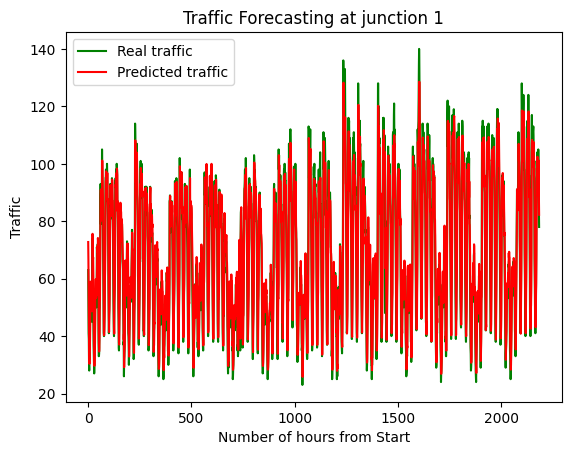

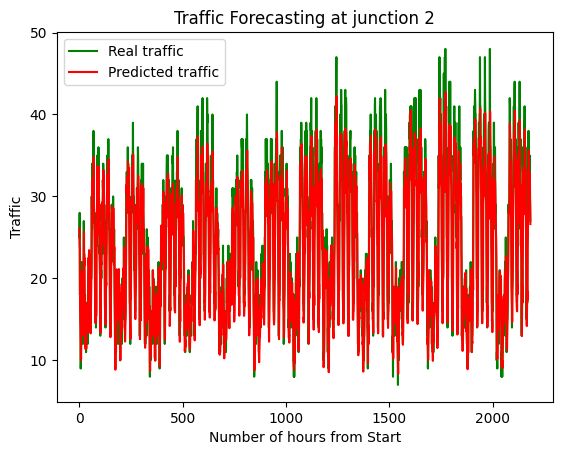

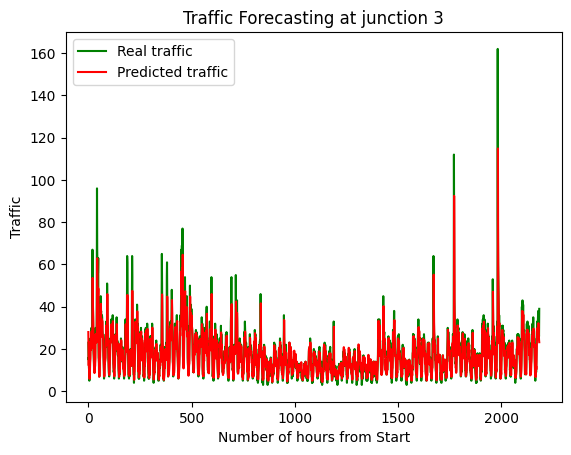

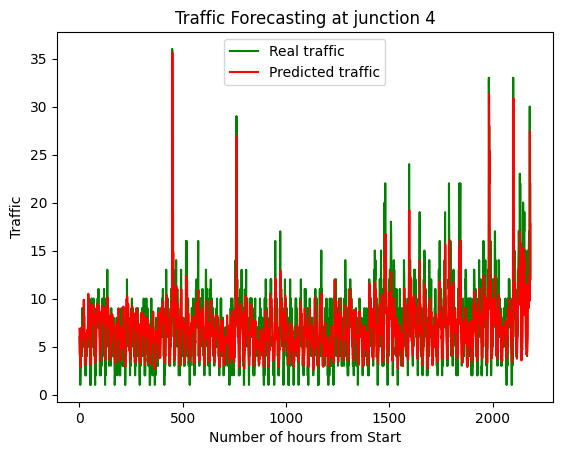

In [27]:
# Visualising Result for the junctions
for junction in range(4):
    plt.figure
    plt.plot(y_truth.values[:,junction],color='green', label='Real traffic')
    plt.plot(y_pred[:,junction],color='red',label ='Predicted traffic')
    plt.title('Traffic Forecasting at junction %i' % (junction+1))
    plt.xlabel('Number of hours from Start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_true,y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [29]:
rmse(y_truth,y_pred)

5.660398203533536

In [30]:
import pandas as pd
import numpy as np
trdf = pd.read_csv('train_aWnotuB.csv')
trainMat= trdf.to_numpy()
tedf = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')
testMat=tedf.to_numpy()
train=[]
target=[]
print(trainMat)
for i in trainMat:
    s=i[3]
    year=s/(10**7)
    s=s%(10**7)
    month=s/(10**5)
    s=s%(10**5)
    date=s/(10**3)
    s=s%(10**3)
    time=s/(10)
    s=s%(10)
    junction =s
    train.append([year,month,date,time,junction])
    target.append(i[2])
X= np.array(train)
y=np.array(target)

[['2015-11-01 00:00:00' 1 15 20151101001]
 ['2015-11-01 01:00:00' 1 13 20151101011]
 ['2015-11-01 02:00:00' 1 10 20151101021]
 ...
 ['2017-06-30 21:00:00' 4 16 20170630214]
 ['2017-06-30 22:00:00' 4 22 20170630224]
 ['2017-06-30 23:00:00' 4 12 20170630234]]


In [31]:
jun1=[]
jun2=[]
jun3=[]
jun4=[]
jun5=[]
jun=[jun1,jun2,jun3,jun4,jun5]
for i in range(0,len(train),24):
    ct=0
    for j in range(24):
        ct+=target[i+j]
    jun[train[i][4]-1].append(ct)
jun[3]=[0]*(len(jun[0])-len(jun[3]))+jun[3]
print(len(jun[0]),len(jun[1]),len(jun[2]),len(jun[3]))

k=7
week=[[] for i in range(k)]
for i in range(len(jun[1])):
    week[i%k].append(jun[1][i])
for i in range(k):
    print(np.mean(week[i]))
hour=[[] for i in range(24)]
for i in range(len(jun[0])*24+len(jun[1])*24, len(jun[0])*24+len(jun[1])*24+len(jun[2])*24):
    hour[i%24].append(target[i])
for i in range(24):
    print(np.mean(hour[i]))

temp=[-i for i in jun[3]]
jun[4]=np.add(jun[2],temp)

608 608 608 608
243.45977011494253
365.4942528735632
397.367816091954
394.0
384.632183908046
358.62068965517244
249.90697674418604
14.174342105263158
9.856907894736842
8.055921052631579
6.776315789473684
5.978618421052632
5.685855263157895
6.2368421052631575
7.550986842105263
9.057565789473685
11.429276315789474
15.004934210526315
17.1875
17.707236842105264
16.049342105263158
17.57236842105263
17.37171052631579
16.88157894736842
16.901315789473685
17.929276315789473
19.129934210526315
20.200657894736842
18.72203947368421
17.394736842105264
15.800986842105264


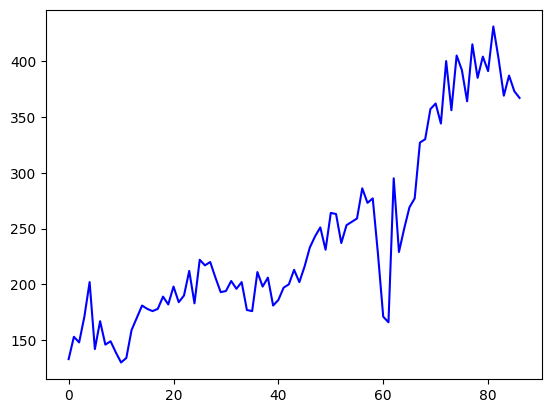

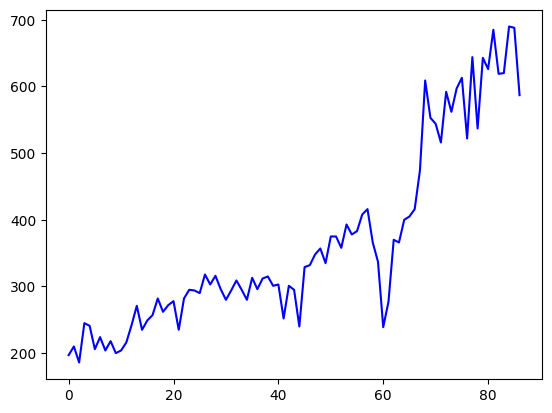

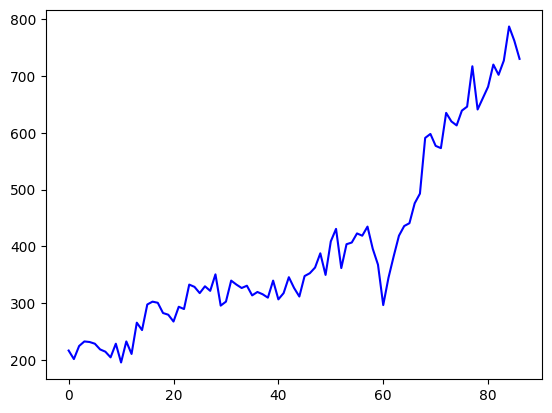

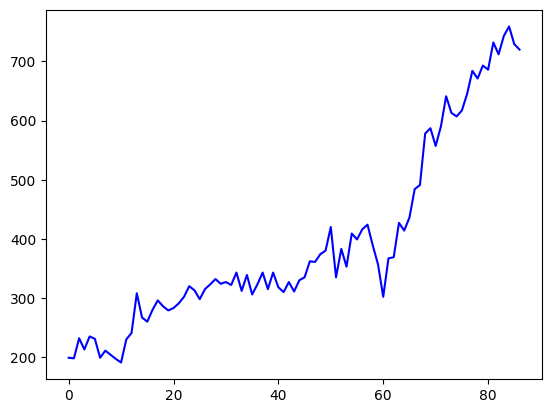

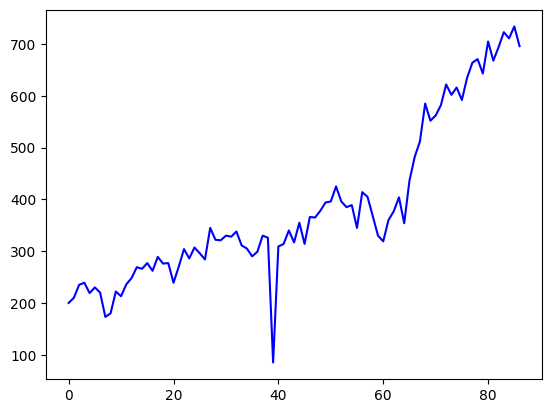

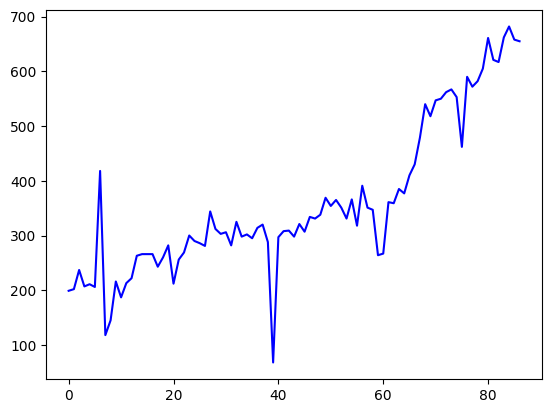

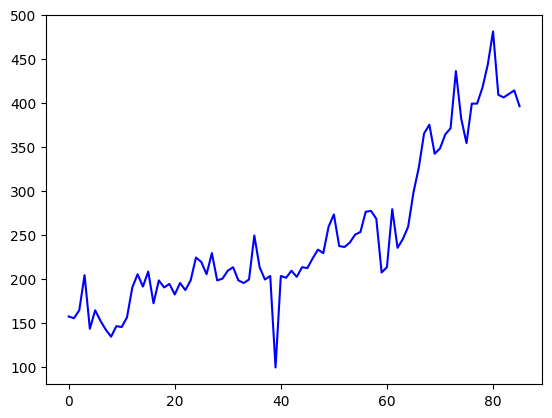

In [32]:
import matplotlib.pyplot as plt
for i in range(len(week)):
    plt.plot(week[i],'blue')
    plt.show()

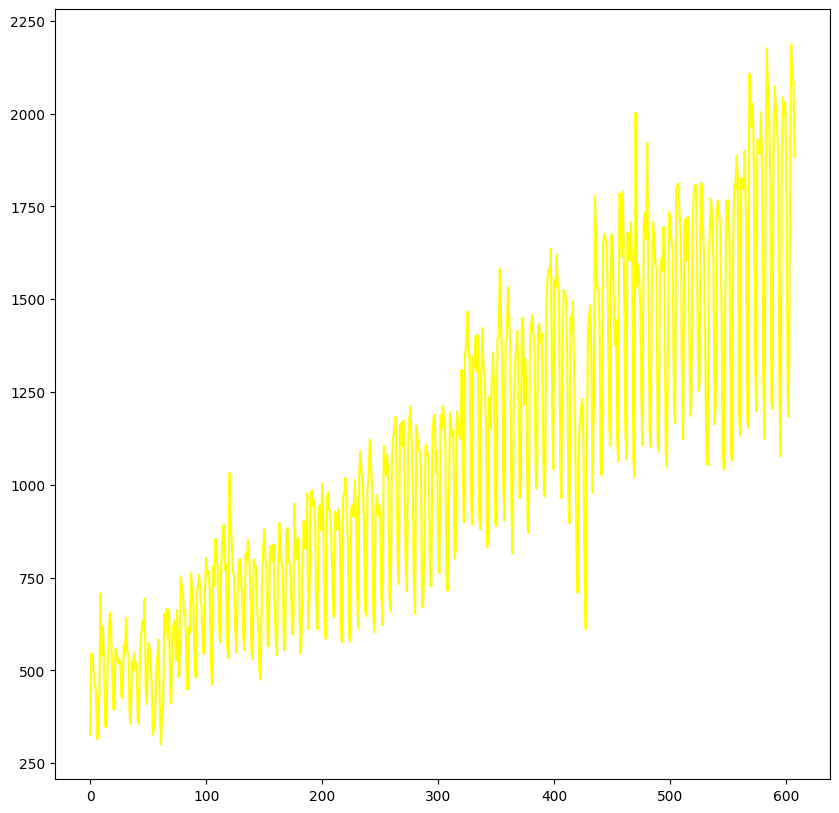

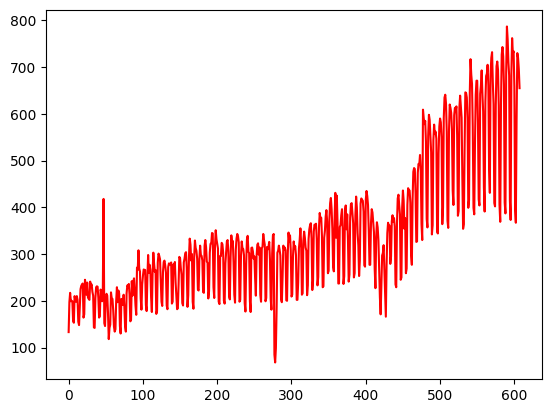

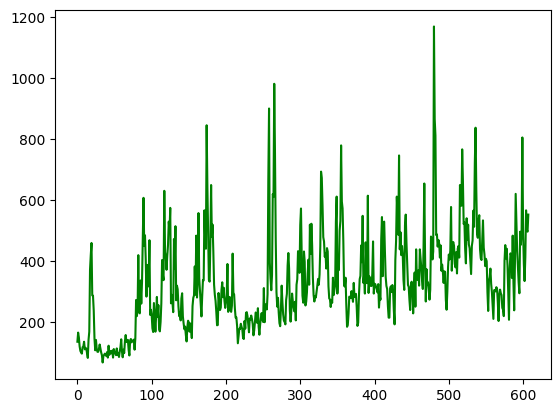

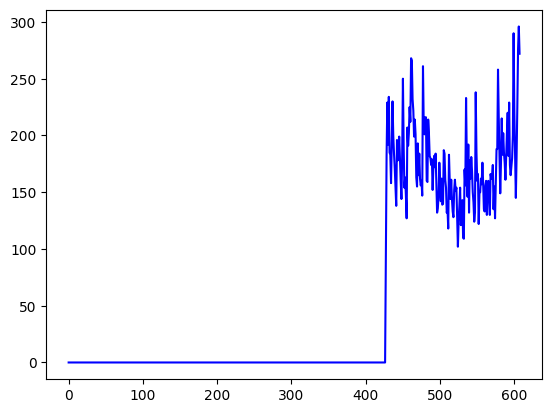

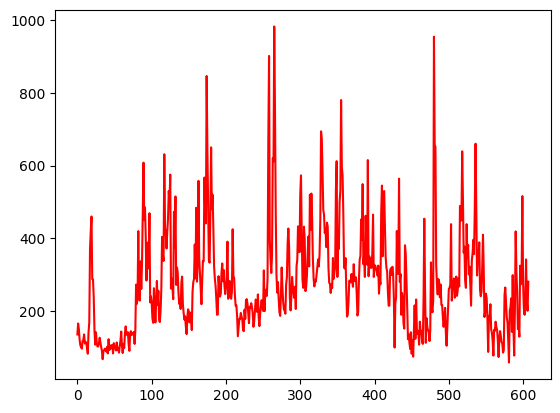

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(jun[0],'yellow')
plt.show()
plt.plot(jun[1],'red')
plt.show()
plt.plot(jun[2],'green')
plt.show()
plt.plot(jun[3],'blue')
plt.show()
plt.plot(jun[4],'red')
plt.show()

# Random Forest Classifier

In [34]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=7)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion='entropy',min_samples_split=100,min_samples_leaf=10,max_depth=12)
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
clf.fit(X,y)
pred = clf.predict(X)
val1=(accuracy_score(y,pred)*100)
print("Accuracy Score for Random Forest :",val1*5)

Accuracy Score for Random Forest : 104.1147132169576


In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse1(y_true,y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [37]:
rmse1(y,pred)

7.8408433075721256

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X,y)
pred2 = DT.predict(X)
val2= (accuracy_score(y,pred2)*100)
print("Accuracy score for Decision tree classifer : ",val2*5)

Accuracy score for Decision tree classifer :  500.0


In [39]:
rmse1(y,pred2)

0.0

# Support Vector Machine

In [40]:
from sklearn.svm import SVC 
SVM = SVC(kernel='linear')
SVM.fit(X,y)
pred3 = SVM.predict(X)
val3= (accuracy_score(y,pred3)*100)
print("Accuracy score for SVM : ",val3*5)

Accuracy score for SVM :  41.1783042394015


# Accuarcy of models

[Text(0, 0, 'Rf'), Text(1, 0, 'DT'), Text(2, 0, 'SVM')]

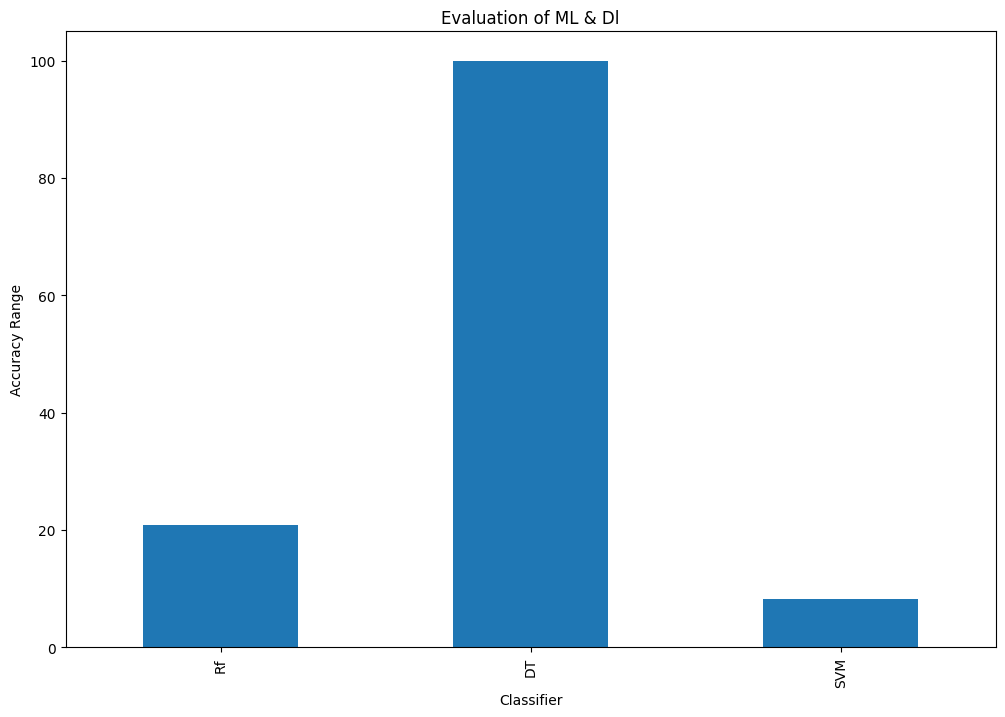

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Bring some raw data
frequencies =[val1,val2,val3]
freq_series = pd.Series(frequencies)

x_labels = ['Rf','DT','SVM']

#plot the figure
plt.figure(figsize=(12,8))
ax= freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & Dl')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


So from the above model evaluation we get the highest accuracy for the Decision Tree so we are going to predict the vehicles by using the decision tree classifier model

# DECISION TREE MODEL

Accuracy score for Decision Tree classifier: 500.0
MAE for Decision Tree classifier: 0.0
RMSE for Decision Tree classifier: 0.0


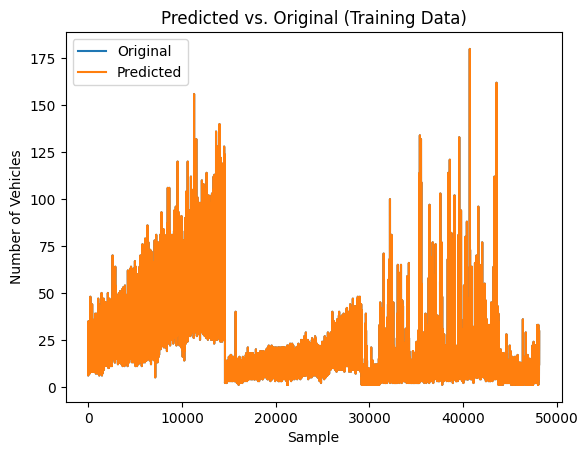

In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
trdf = pd.read_csv('train_aWnotuB.csv')
trainMat = trdf.to_numpy()

# Load the test data
tedf = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')

# Prepare the training data
train = []
target = []
for i in trainMat:
    s = i[3]
    year = s // (10 ** 7)
    s = s % (10 ** 7)
    month = s // (10 ** 5)
    s = s % (10 ** 5)
    date = s // (10 ** 3)
    s = s % (10 ** 3)
    time = s // 10
    s = s % 10
    junction = s
    train.append([year, month, date, time, junction])
    target.append(i[2])
X = np.array(train)
y = np.array(target)

# Define the Decision Tree classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X, y)

# Predict the values for the training data
pred_dt = clf_dt.predict(X)

# Calculate accuracy score
val_dt = accuracy_score(y, pred_dt) * 100
print("Accuracy score for Decision Tree classifier:", val_dt * 5)

# Calculate MAE and RMSE
mae_dt = mean_absolute_error(y, pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y, pred_dt))
print("MAE for Decision Tree classifier:", mae_dt)
print("RMSE for Decision Tree classifier:", rmse_dt)

# Plot the predicted values and original values for the training data
plt.plot(y, label='Original')
plt.plot(pred_dt, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Number of Vehicles')
plt.title('Predicted vs. Original (Training Data)')
plt.legend()
plt.show()

# Prepare the test data
test = []
for i in range(len(tedf)):
    s = tedf['DateTime'][i]
    year = int(s[:4])
    month = int(s[5:7])
    date = int(s[8:10])
    time = int(s[11:13])
    junction = tedf['Junction'][i]
    test.append([year, month, date, time, junction])

X_test = np.array(test)

# Predict the values for the test data
predictions = clf_dt.predict(X_test)

# Store the predicted values in a new CSV file
tedf['Vehicles'] = predictions
tedf.to_csv('predicted_values.csv', index=False)


In [43]:
p=pd.read_csv('predicted_values.csv')
p['DateTime'] = pd.to_datetime(p['DateTime'])

In [44]:
pdf = p.pivot(columns="Junction", index="DateTime",values='Vehicles')  

In [45]:
pred_dataframe_1 = pdf[1]
pred_dataframe_2 = pdf[2]  
pred_dataframe_3 = pdf[3]  
pred_dataframe_4 = pdf[4] 

# Traffic Predictions for next 4 months of given test data

Text(0.5, 0, 'Date')

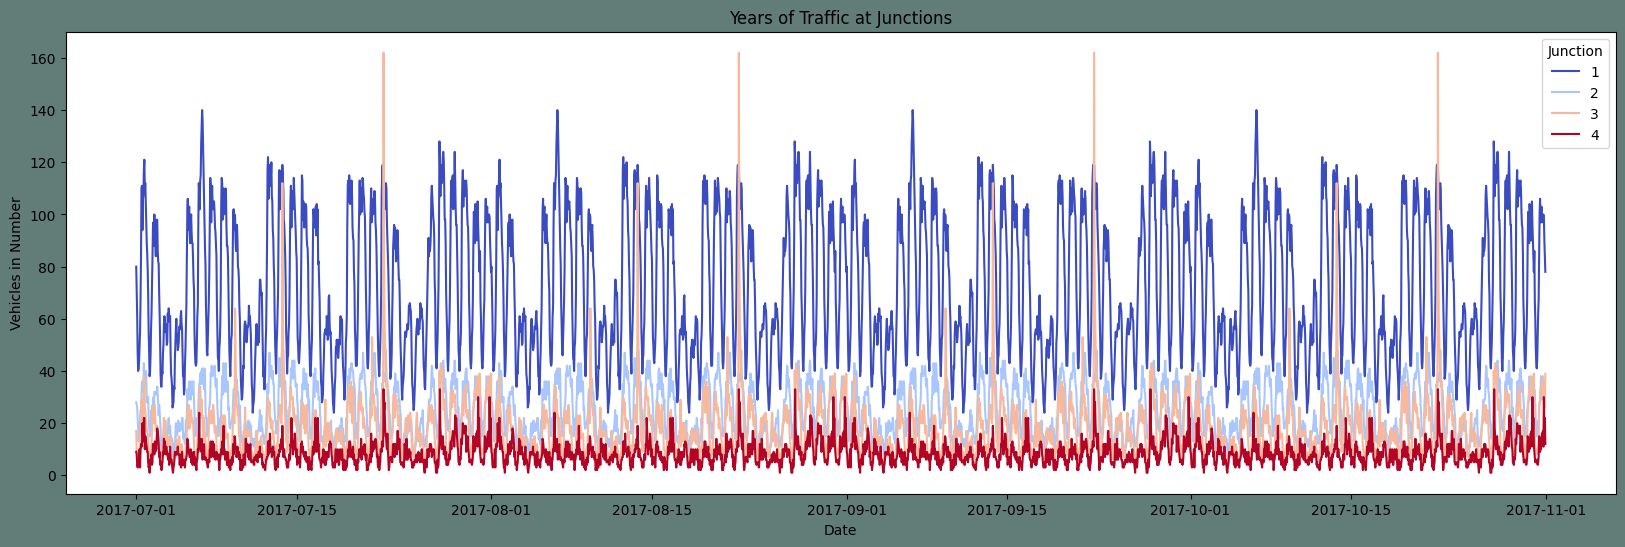

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#timeseries plot of data
plt.figure(figsize=(20,6),facecolor="#627D78")  
Time_series=sns.lineplot(x='DateTime',y="Vehicles",data=p, hue="Junction", palette='coolwarm')  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")

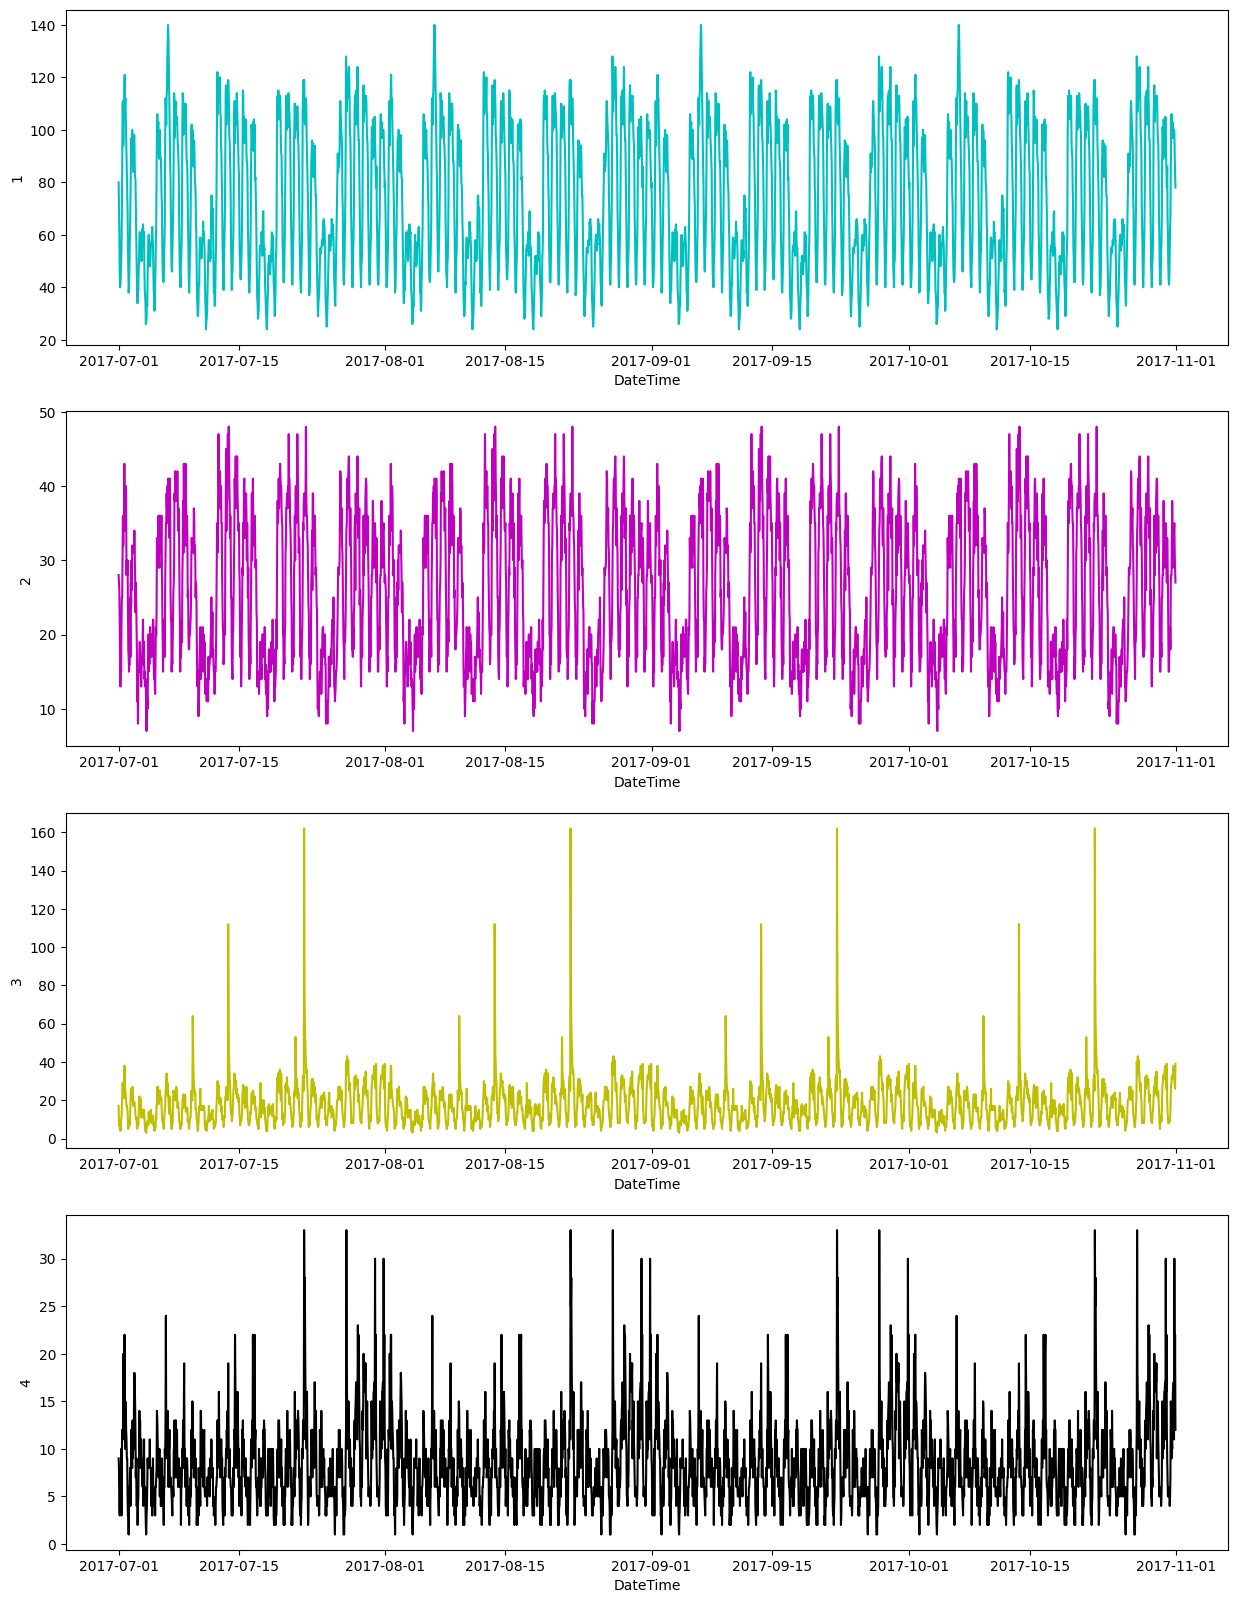

In [48]:

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax=sns.lineplot(data=pred_dataframe_1,color='c')

plt.subplot(4,1,2)
ax=sns.lineplot(data=pred_dataframe_2,color='m')

plt.subplot(4,1,3)
ax=sns.lineplot(data=pred_dataframe_3,color='y')

plt.subplot(4,1,4)
ax=sns.lineplot(data=pred_dataframe_4,color='k')

ax=sns.lineplot()